# **PHD (Alden Paul Pinto, Student ID : 3378)**



---



---



**Defining business problem** :
To build a predictive regression model to forecast the sales of a retail e-commerce company and provide data supported solutions to business questions asked by the operations team.



---



## **1. Free up RAM & Disk Space**

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=fd196809e38495177dcae6eea6cdf0d2e9c31c719188ac309d5642b39c926332
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 26.3 GB  | Proc size: 156.4 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
!kill -9 -1



---

---





## **2. Mount Drive & Set Path**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
train_path='/content/drive/My Drive/PHD 2020'

In [ ]:
cd /content/drive/My Drive/PHD 2020

/content/drive/My Drive/PHD 2020




---


---










## **3. Import Libraries**

In [ ]:
import os

import numpy as np
import pandas as pd

impdearort matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns#visualization

import datetime
import sklearn



---



---



## **4. Import the Dataset with Memory Optimization** *italicized text*

The 4 datasets (train.csv, item_details.csv, location_details.csv, train_transactions.csv) were merged together using SQL on Microsoft SQL Server 2019 and the PDF containing the SQL code for the same can be viewed by clicking on the link below.

[Click to view PDF.](https://documentcloud.adobe.com/link/track?uri=urn%3Aaaid%3Ascds%3AUS%3A33bdb3f8-2d4d-4921-a135-d71fb5ba90f1)

In [ ]:
pwd

'/content/drive/My Drive/PHD 2020'

In [ ]:
#Function for memory optimization
def reduce_mem_usage():
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """

    #Import the merged dataset (train + item_details + location_details + train_transactions)
    df=pd.read_csv('/content/drive/My Drive/PHD 2020/train_merged.csv',na_values=["?",",",""],error_bad_lines=False)
    print("Data Type of columns in the data frame before optimization")
    print(df.dtypes)
    print()

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the data frame before optimization is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the data frame after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print()

    print("Data type of columns in the data frame after optimization")
    print(df.dtypes)
    print()

    return df


#Optimized train dataset
trainOpt=reduce_mem_usage()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Data Type of columns in the data frame before optimization
date                 object
locationId            int64
item_id               int64
unit_sales          float64
onpromotion          object
class                 int64
category_of_item     object
perishable            int64
city                 object
state                object
cluster               int64
type                 object
transactions        float64
dtype: object

Memory usage of the data frame before optimization is 10104.89 MB
Memory usage of the data frame after optimization is: 2137.63 MB
Decreased by 78.8%

Data type of columns in the data frame after optimization
date                category
locationId              int8
item_id                int32
unit_sales           float32
onpromotion         category
class                  int16
category_of_item    category
perishable              int8
city                category
state               category
cluster                 int8
type                category
trans

In [ ]:
trainOpt.head()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-12-16,39,1105215,6.0,NaN,1074,gro_itm,0,Hyd,TG,6,B,1655.0
1,2015-12-16,39,1114749,2.0,NaN,3040,cln_utl,0,Hyd,TG,6,B,1655.0
2,2015-12-16,39,1121616,2.0,NaN,2644,del_itm,1,Hyd,TG,6,B,1655.0
3,2015-12-16,39,1137146,3.0,NaN,1074,gro_itm,0,Hyd,TG,6,B,1655.0
4,2015-12-16,39,1146799,1.0,NaN,1040,gro_itm,0,Hyd,TG,6,B,1655.0


In [ ]:
trainOpt.head()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-12-16,39,1105215,6.0,NaN,1074,gro_itm,0,Hyd,TG,6,B,1655.0
1,2015-12-16,39,1114749,2.0,NaN,3040,cln_utl,0,Hyd,TG,6,B,1655.0
2,2015-12-16,39,1121616,2.0,NaN,2644,del_itm,1,Hyd,TG,6,B,1655.0
3,2015-12-16,39,1137146,3.0,NaN,1074,gro_itm,0,Hyd,TG,6,B,1655.0
4,2015-12-16,39,1146799,1.0,NaN,1040,gro_itm,0,Hyd,TG,6,B,1655.0


In [ ]:
#Sort the dataset by 'date' column
trainOpt.sort_values(by=['date'],inplace=True,ascending=True)
trainOpt.reset_index(inplace=True)

In [ ]:
trainOpt.head()

,index,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,353690,2015-01-01,25,890372,1.0,NaN,1002,gro_itm,0,Kan,UP,1,D,770.0
1,374022,2015-01-01,25,829389,1.0,NaN,1025,gro_itm,0,Kan,UP,1,D,770.0
2,374023,2015-01-01,25,838216,4.0,NaN,2124,dar_itm,1,Kan,UP,1,D,770.0
3,374024,2015-01-01,25,841197,5.0,NaN,2708,bak,1,Kan,UP,1,D,770.0
4,374025,2015-01-01,25,847859,12.0,NaN,1122,bev,0,Kan,UP,1,D,770.0


In [ ]:
trainOpt.drop(['index'],axis=1,inplace=True)

In [ ]:
trainOpt.head()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-01-01,25,890372,1.0,NaN,1002,gro_itm,0,Kan,UP,1,D,770.0
1,2015-01-01,25,829389,1.0,NaN,1025,gro_itm,0,Kan,UP,1,D,770.0
2,2015-01-01,25,838216,4.0,NaN,2124,dar_itm,1,Kan,UP,1,D,770.0
3,2015-01-01,25,841197,5.0,NaN,2708,bak,1,Kan,UP,1,D,770.0
4,2015-01-01,25,847859,12.0,NaN,1122,bev,0,Kan,UP,1,D,770.0


In [ ]:
trainOpt.dtypes

date                category
locationId              int8
item_id                int32
unit_sales           float32
onpromotion         category
class                  int16
category_of_item    category
perishable              int8
city                category
state               category
cluster                 int8
type                category
transactions         float16
dtype: object

In [ ]:
#Convert 'date' column to datetime type
trainOpt['date'] = trainOpt['date'].astype('object')
trainOpt['date'] = pd.to_datetime(trainOpt['date'])

In [ ]:
trainOpt.dtypes

date                datetime64[ns]
locationId                    int8
item_id                      int32
unit_sales                 float32
onpromotion               category
class                        int16
category_of_item          category
perishable                    int8
city                      category
state                     category
cluster                       int8
type                      category
transactions               float16
dtype: object



---


---







## **5. Exploratory Data Analysis**

### **Commonly used functions to understand the dataset**

In [ ]:
trainOpt.head()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-01-01,25,890372,1.0,NaN,1002,gro_itm,0,Kan,UP,1,D,770.0
1,2015-01-01,25,829389,1.0,NaN,1025,gro_itm,0,Kan,UP,1,D,770.0
2,2015-01-01,25,838216,4.0,NaN,2124,dar_itm,1,Kan,UP,1,D,770.0
3,2015-01-01,25,841197,5.0,NaN,2708,bak,1,Kan,UP,1,D,770.0
4,2015-01-01,25,847859,12.0,NaN,1122,bev,0,Kan,UP,1,D,770.0


In [ ]:
trainOpt.head(n=25)

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-01-01,25,890372,1.0,NaN,1002,gro_itm,0,Kan,UP,1,D,770.0
1,2015-01-01,25,829389,1.0,NaN,1025,gro_itm,0,Kan,UP,1,D,770.0
2,2015-01-01,25,838216,4.0,NaN,2124,dar_itm,1,Kan,UP,1,D,770.0
3,2015-01-01,25,841197,5.0,NaN,2708,bak,1,Kan,UP,1,D,770.0
4,2015-01-01,25,847859,12.0,NaN,1122,bev,0,Kan,UP,1,D,770.0
5,2015-01-01,25,870546,2.0,NaN,4126,per_car,0,Kan,UP,1,D,770.0
6,2015-01-01,25,1084881,2.0,NaN,1040,gro_itm,0,Kan,UP,1,D,770.0
7,2015-01-01,25,1088002,1.0,NaN,1126,bev,0,Kan,UP,1,D,770.0
8,2015-01-01,25,1097187,5.0,NaN,1042,gro_itm,0,Kan,UP,1,D,770.0
9,2015-01-01,25,1102975,1.0,NaN,1122,bev,0,Kan,UP,1,D,770.0


In [ ]:
trainOpt.tail()

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D,2236.0
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D,2236.0
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D,2236.0
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D,1478.0
101882208,2018-12-31,10,1153584,18.000,False,1122,bev,0,Ben,KA,15,C,1557.0


In [ ]:
trainOpt.tail(n=16)

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
101882193,2018-12-31,26,1472433,3.000000,True,1074,gro_itm,0,Mum,MH,10,D,1478.0
101882194,2018-12-31,26,1473482,5.410000,False,2034,otf_pro,1,Mum,MH,10,D,1478.0
101882195,2018-12-31,26,1489880,10.000000,True,2018,otf_pro,1,Mum,MH,10,D,1478.0
101882196,2018-12-31,26,1503899,12.000000,False,2028,otf_pro,1,Mum,MH,10,D,1478.0
101882197,2018-12-31,26,1576328,1.000000,False,5324,hmp_utl,0,Mum,MH,10,D,1478.0
101882198,2018-12-31,26,1693657,50.000000,False,2018,otf_pro,1,Mum,MH,10,D,1478.0
101882199,2018-12-31,26,1695815,25.000000,False,2016,otf_pro,1,Mum,MH,10,D,1478.0
101882200,2018-12-31,26,1695825,1.288000,False,2002,otf_pro,1,Mum,MH,10,D,1478.0
101882201,2018-12-31,26,1695841,3.255000,False,2006,otf_pro,1,Mum,MH,10,D,1478.0
101882202,2018-12-31,26,1695931,21.768999,False,2008,otf_pro,1,Mum,MH,10,D,1478.0


In [ ]:
trainOpt.shape

(101882209, 13)

In [ ]:
trainOpt.describe()

,locationId,item_id,unit_sales,class,perishable,cluster,transactions
count,1.018822e+08,1.018822e+08,1.018822e+08,1.018822e+08,1.018822e+08,1.018822e+08,101667584.0
mean,2.735150e+01,9.291019e+05,5.813337e+00,1.962230e+03,2.518689e-01,8.737041e+00,NaN
std,1.635366e+01,4.956831e+05,2.295363e+01,1.140094e+03,4.340864e-01,4.636275e+00,NaN
min,1.000000e+00,9.699500e+04,-1.537200e+04,1.002000e+03,0.000000e+00,1.000000e+00,5.0
25%,1.200000e+01,5.100540e+05,2.000000e+00,1.048000e+03,0.000000e+00,4.000000e+00,1158.0
50%,2.800000e+01,9.269580e+05,4.000000e+00,1.190000e+03,0.000000e+00,9.000000e+00,1562.0
75%,4.300000e+01,1.247036e+06,9.000000e+00,2.712000e+03,1.000000e+00,1.300000e+01,2408.0
max,5.400000e+01,2.124052e+06,8.944000e+04,7.780000e+03,1.000000e+00,1.700000e+01,8360.0


In [ ]:
trainOpt.describe(include="all")

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
count,101882209,1.018822e+08,1.018822e+08,1.018822e+08,80224558,1.018822e+08,101882209,1.018822e+08,101882209,101882209,1.018822e+08,101882209,101667584.0
unique,1456,NaN,NaN,NaN,2,NaN,30,NaN,22,12,NaN,5,NaN
top,2018-02-28 00:00:00,NaN,NaN,NaN,False,NaN,gro_itm,NaN,Ben,KA,NaN,D,NaN
freq,386860,NaN,NaN,NaN,75153473,NaN,37448222,NaN,42533018,44696725,NaN,38247879,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.735150e+01,9.291019e+05,5.813337e+00,NaN,1.962230e+03,NaN,2.518689e-01,NaN,NaN,8.737041e+00,NaN,NaN
std,NaN,1.635366e+01,4.956831e+05,2.295363e+01,NaN,1.140094e+03,NaN,4.340864e-01,NaN,NaN,4.636275e+00,NaN,NaN
min,NaN,1.000000e+00,9.699500e+04,-1.537200e+04,NaN,1.002000e+03,NaN,0.000000e+00,NaN,NaN,1.000000e+00,NaN,5.0
25%,NaN,1.200000e+01,5.100540e+05,2.000000e+00,NaN,1.048000e+03,NaN,0.000000e+00,NaN,NaN,4.000000e+00,NaN,1158.0


In [ ]:
trainOpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101882209 entries, 0 to 101882208
Data columns (total 13 columns):
date                datetime64[ns]
locationId          int8
item_id             int32
unit_sales          float32
onpromotion         category
class               int16
category_of_item    category
perishable          int8
city                category
state               category
cluster             int8
type                category
transactions        float16
dtypes: category(5), datetime64[ns](1), float16(1), float32(1), int16(1), int32(1), int8(3)
memory usage: 2.7 GB


In [ ]:
trainOpt.dtypes

date                datetime64[ns]
locationId                    int8
item_id                      int32
unit_sales                 float32
onpromotion               category
class                        int16
category_of_item          category
perishable                    int8
city                      category
state                     category
cluster                       int8
type                      category
transactions               float16
dtype: object

In [ ]:
trainOpt.index.values

array([        0,         1,         2, ..., 101882206, 101882207,
       101882208])

In [ ]:
trainOpt.columns.values

array(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion',
       'class', 'category_of_item', 'perishable', 'city', 'state',
       'cluster', 'type', 'transactions'], dtype=object)

In [ ]:
trainOpt.index.values.size

101882209

In [ ]:
trainOpt.columns.values.size

13

### Subsetting the training dataset to get a better understanding

In [ ]:
trainOpt.iloc[:,:]

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-01-01,25,890372,1.000,NaN,1002,gro_itm,0,Kan,UP,1,D,770.0
1,2015-01-01,25,829389,1.000,NaN,1025,gro_itm,0,Kan,UP,1,D,770.0
2,2015-01-01,25,838216,4.000,NaN,2124,dar_itm,1,Kan,UP,1,D,770.0
3,2015-01-01,25,841197,5.000,NaN,2708,bak,1,Kan,UP,1,D,770.0
4,2015-01-01,25,847859,12.000,NaN,1122,bev,0,Kan,UP,1,D,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D,2236.0
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D,2236.0
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D,2236.0
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D,1478.0


In [ ]:
trainOpt.iloc[241,8]

'Kan'

In [ ]:
trainOpt.iloc[:9,10:]

,cluster,type,transactions
0,1,D,770.0
1,1,D,770.0
2,1,D,770.0
3,1,D,770.0
4,1,D,770.0
5,1,D,770.0
6,1,D,770.0
7,1,D,770.0
8,1,D,770.0


In [ ]:
trainOpt.iloc[99999999:,:10]

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state
99999999,2018-12-13,48,843607,7.000,False,1042,gro_itm,0,Ben,KA
100000000,2018-12-13,48,843608,2.000,False,1042,gro_itm,0,Ben,KA
100000001,2018-12-13,48,847863,4.000,False,1058,gro_itm,0,Ben,KA
100000002,2018-12-13,48,852110,15.000,False,3038,cln_utl,0,Ben,KA
100000003,2018-12-13,48,852620,1.000,False,3024,cln_utl,0,Ben,KA
...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH


In [ ]:
trainOpt.iloc[[100,200,1000],[0,5,9,2]]

,date,class,state,item_id
100,2015-01-01,4252,UP,958514
200,2015-01-01,1029,UP,1086172
1000,2015-01-02,1136,KA,938659


In [ ]:
trainOpt.loc[:,:]

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,transactions
0,2015-01-01,25,890372,1.000,NaN,1002,gro_itm,0,Kan,UP,1,D,770.0
1,2015-01-01,25,829389,1.000,NaN,1025,gro_itm,0,Kan,UP,1,D,770.0
2,2015-01-01,25,838216,4.000,NaN,2124,dar_itm,1,Kan,UP,1,D,770.0
3,2015-01-01,25,841197,5.000,NaN,2708,bak,1,Kan,UP,1,D,770.0
4,2015-01-01,25,847859,12.000,NaN,1122,bev,0,Kan,UP,1,D,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D,2236.0
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D,2236.0
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D,2236.0
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D,1478.0


In [ ]:
trainOpt.loc[:25,"unit_sales"]

0      1.0
1      1.0
2      4.0
3      5.0
4     12.0
5      2.0
6      2.0
7      1.0
8      5.0
9      1.0
10     2.0
11     3.0
12     7.0
13     2.0
14     2.0
15     1.0
16     1.0
17     1.0
18     8.0
19     3.0
20     9.0
21    13.0
22     1.0
23    13.0
24     1.0
25     9.0
Name: unit_sales, dtype: float32

In [ ]:
trainOpt.loc[73000000:,["date","perishable","city"]]

,date,perishable,city
73000000,2018-03-09,1,Gur
73000001,2018-03-09,1,Gur
73000002,2018-03-09,0,Gur
73000003,2018-03-09,0,Gur
73000004,2018-03-09,0,Gur
...,...,...,...
101882204,2018-12-31,0,Del
101882205,2018-12-31,0,Del
101882206,2018-12-31,0,Del
101882207,2018-12-31,1,Mum


In [ ]:
trainOpt.loc[[32828,113232,1332477,],"perishable":"transactions"]

,perishable,city,state,cluster,type,transactions
32828,0,Ahm,GJ,15,C,1622.0
113232,0,Mys,KA,1,D,1034.0
1332477,1,Kol,WB,6,B,2882.0




---

---








## **6. Data Preprocessing**

### Dealing with missing values

In [ ]:
trainOpt.isnull().sum()

date                       0
locationId                 0
item_id                    0
unit_sales                 0
onpromotion         21657651
class                      0
category_of_item           0
perishable                 0
city                       0
state                      0
cluster                    0
type                       0
transactions          214625
dtype: int64

In [ ]:
trainOpt["onpromotion"].value_counts(dropna=False)

False    75153473
NaN      21657651
True      5071085
Name: onpromotion, dtype: int64

In [ ]:
mode_op={k:i for k,i in zip(["onpromotion"],trainOpt[["onpromotion"]].mode().values.reshape(1,))}
mode_op

{'onpromotion': False}

In [ ]:
trainOpt[["onpromotion"]]=trainOpt[["onpromotion"]].fillna(mode_op)

In [ ]:
trainOpt["onpromotion"].value_counts()

False    96811124
True      5071085
Name: onpromotion, dtype: int64

In [ ]:
median_trans={k:i for k,i in zip(["transactions"],trainOpt[["transactions"]].median().values.reshape(1,))}
median_trans

{'transactions': 1562.0}

In [ ]:
trainOpt[["transactions"]]=trainOpt[["transactions"]].fillna(median_trans)

In [ ]:
trainOpt.isnull().sum()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
class               0
category_of_item    0
perishable          0
city                0
state               0
cluster             0
type                0
transactions        0
dtype: int64

In [ ]:
trainOpt.drop(['transactions'],axis=1,inplace=True)

In [ ]:
trainOpt

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
0,2015-01-01,25,890372,1.000,False,1002,gro_itm,0,Kan,UP,1,D
1,2015-01-01,25,829389,1.000,False,1025,gro_itm,0,Kan,UP,1,D
2,2015-01-01,25,838216,4.000,False,2124,dar_itm,1,Kan,UP,1,D
3,2015-01-01,25,841197,5.000,False,2708,bak,1,Kan,UP,1,D
4,2015-01-01,25,847859,12.000,False,1122,bev,0,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D




---

---





## **7. Data Visualizations**

### Plot 1 : Bar plot of the number of observations in each year (which is a rough indicator of sales in that year)

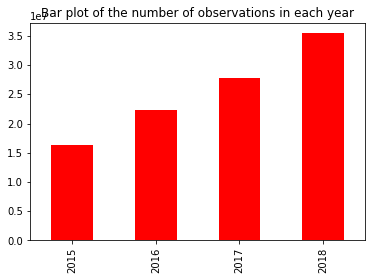

In [ ]:
trainOpt['date'].dt.year.value_counts(sort = False).plot.bar(color='red')
plt.title("Bar plot of the number of observations in each year")
plt.show()

**Insight :** There is a progressive increase in the number of observations for each year, which indicates the company's business is growing with time. It is becoming more popular, maintaining a customer base, while constantly attracting new customers. In other words, the trend in sales of the company is positive.

### Plot 2 : Bar plot of the the number of observations distributed month-wise (which is a rough indicator of sales in a month)

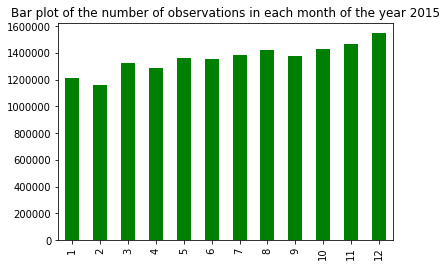

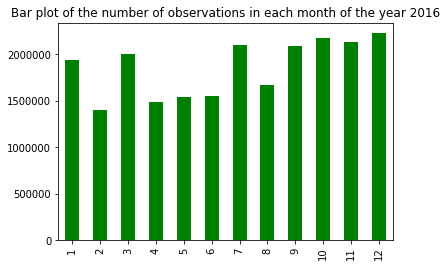

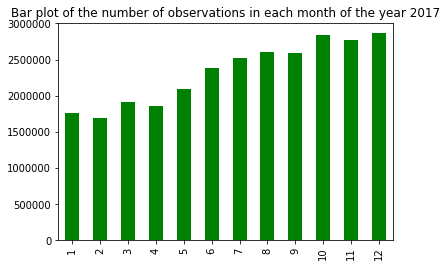

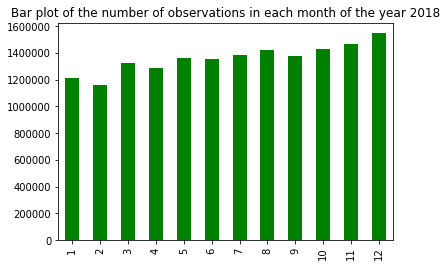

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["date"].dt.month.value_counts(sort=False).plot.bar(color='green')
plt.title("Bar plot of the number of observations in each month of the year 2015")
plt.show()

print()

trainOpt[trainOpt["date"].dt.year==2016]["date"].dt.month.value_counts(sort=False).plot.bar(color='green')
plt.title("Bar plot of the number of observations in each month of the year 2016")
plt.show()

print()

trainOpt[trainOpt["date"].dt.year==2017]["date"].dt.month.value_counts(sort=False).plot.bar(color='green')
plt.title("Bar plot of the number of observations in each month of the year 2017")
plt.show()

print()

trainOpt[trainOpt["date"].dt.year==2015]["date"].dt.month.value_counts(sort=False).plot.bar(color='green')
plt.title("Bar plot of the number of observations in each month of the year 2018")
plt.show()

**Insight :** There is a likelihood that there are two factors in play : one being the general trend of increase in growth with time, the other is the disparity in the number of days in each month which affects the total number of observations (sales) in that month. In general we can say that the maximum occurs in December and the minimum in February (due to lowest number of days) with a general increase in sales as the year progressses (except in the year 2016).  

### Plot 3 : Bar plot of the the number of observations in nth day of all months combined (i.e. 1st day of each of the 12 months, 2nd day...)

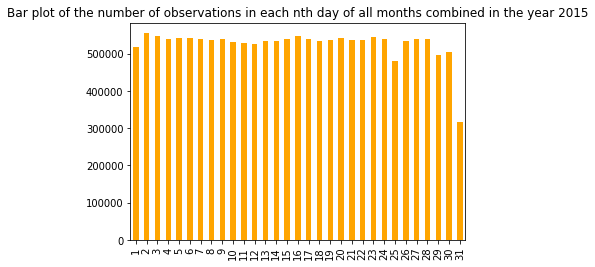

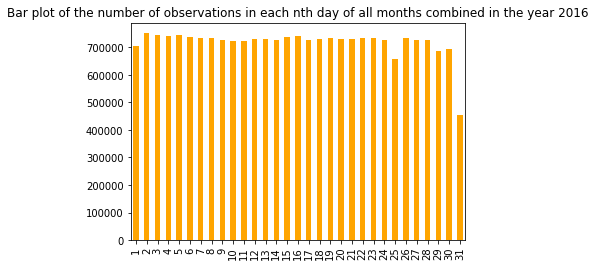

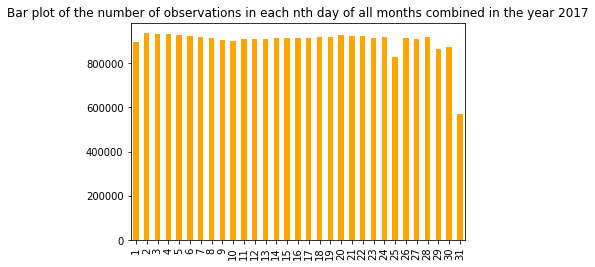

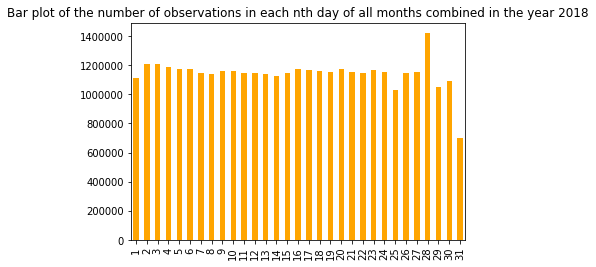

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["date"].dt.day.value_counts(sort=False).plot.bar(color='orange')
plt.title("Bar plot of the number of observations in each nth day of all months combined in the year 2015")
plt.show()

print()

trainOpt[trainOpt["date"].dt.year==2016]["date"].dt.day.value_counts(sort=False).plot.bar(color='orange')
plt.title("Bar plot of the number of observations in each nth day of all months combined in the year 2016")
plt.show()

print()

trainOpt[trainOpt["date"].dt.year==2017]["date"].dt.day.value_counts(sort=False).plot.bar(color='orange')
plt.title("Bar plot of the number of observations in each nth day of all months combined in the year 2017")
plt.show()

print()

trainOpt[trainOpt["date"].dt.year==2018]["date"].dt.day.value_counts(sort=False).plot.bar(color='orange')
plt.title("Bar plot of the number of observations in each nth day of all months combined in the year 2018")
plt.show()

**Insight :** The number of observations is almost uniformly distributed by day. As expected, the number of observations is the least for the 31st day since only a few months of the year have 31 days. Also, the 25th day of a month tends to have lower orders as shown in the plot - consistent through all the years. There is no apparent reason for this behavior.

### Plot 4 : Bar plot of the distribution of sales location-wise in each year

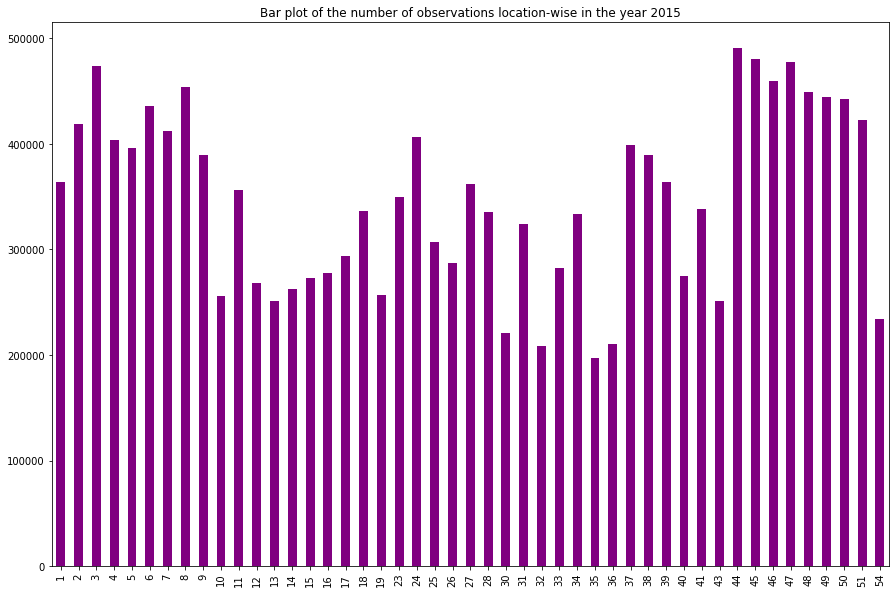

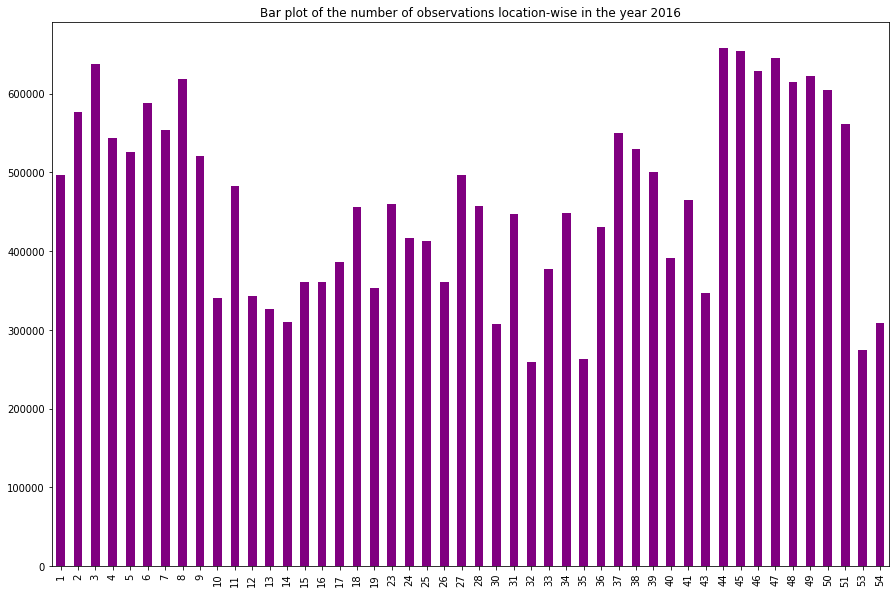

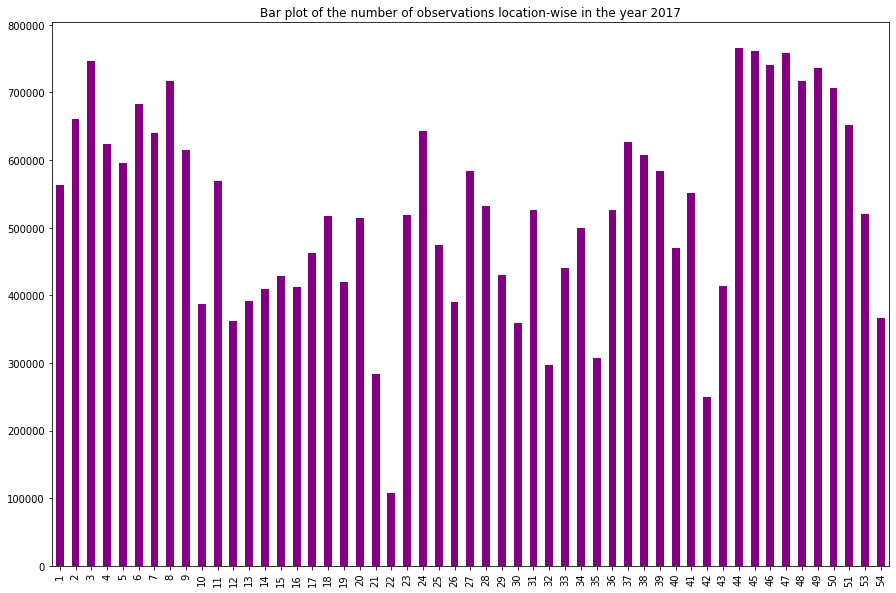

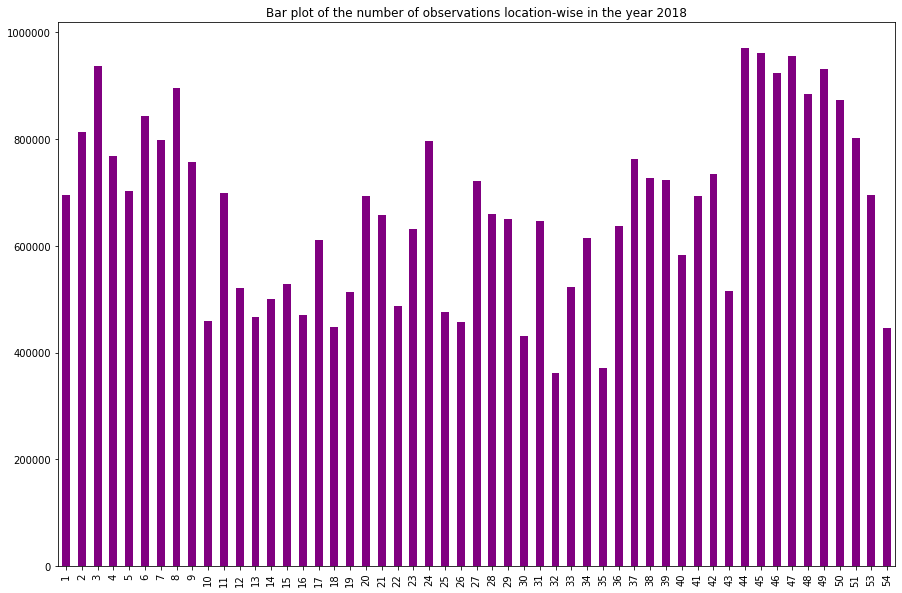

In [ ]:
plt.figure(figsize=(15,10))
trainOpt[trainOpt["date"].dt.year==2015]["locationId"].value_counts(sort=False).plot.bar(color='purple')
plt.title("Bar plot of the number of observations location-wise in the year 2015")
plt.show()

print()

plt.figure(figsize=(15,10))
trainOpt[trainOpt["date"].dt.year==2016]["locationId"].value_counts(sort=False).plot.bar(color='purple')
plt.title("Bar plot of the number of observations location-wise in the year 2016")
plt.show()

print()

plt.figure(figsize=(15,10))
trainOpt[trainOpt["date"].dt.year==2017]["locationId"].value_counts(sort=False).plot.bar(color='purple')
plt.title("Bar plot of the number of observations location-wise in the year 2017")
plt.show()

print()

plt.figure(figsize=(15,10))
trainOpt[trainOpt["date"].dt.year==2018]["locationId"].value_counts(sort=False).plot.bar(color='purple')
plt.title("Bar plot of the number of observations location-wise in the year 2018")
plt.show()

print()

**Insight :** The y-axis is the number of observations corresponding to a particular location. A location with more observations does not necessarily outperform a store with fewer observations. This is because some locations may offer a wider range of products but push less volume. This would inflate their numbers in this plot. We can interpret the y-axis as a measure of the locations's variety.



### Plot 5 : Bar plot depicting the number of unique items sold from a particular location in each year

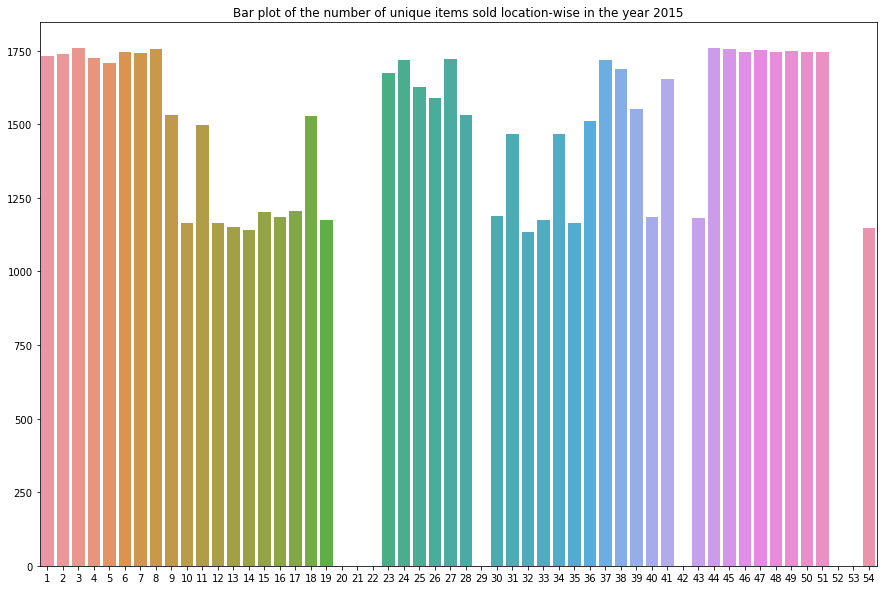

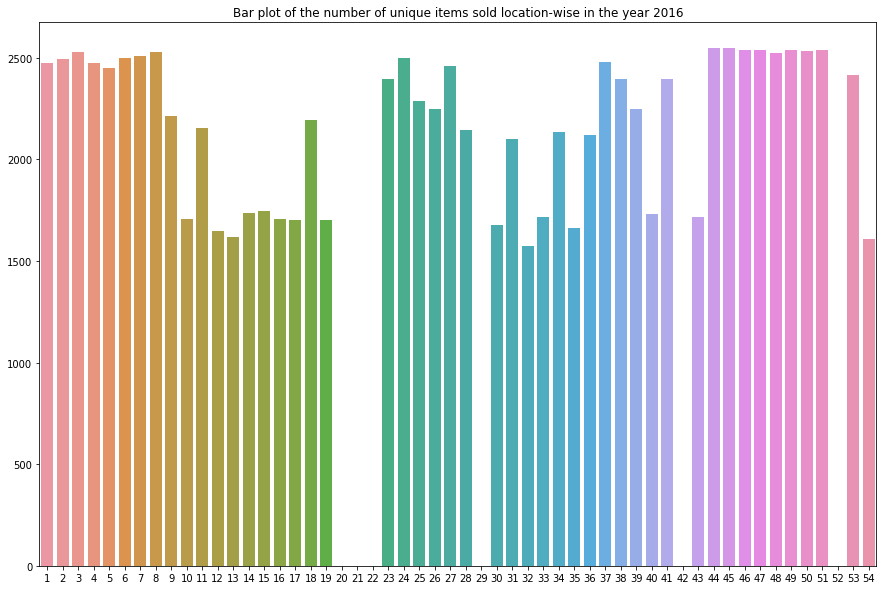

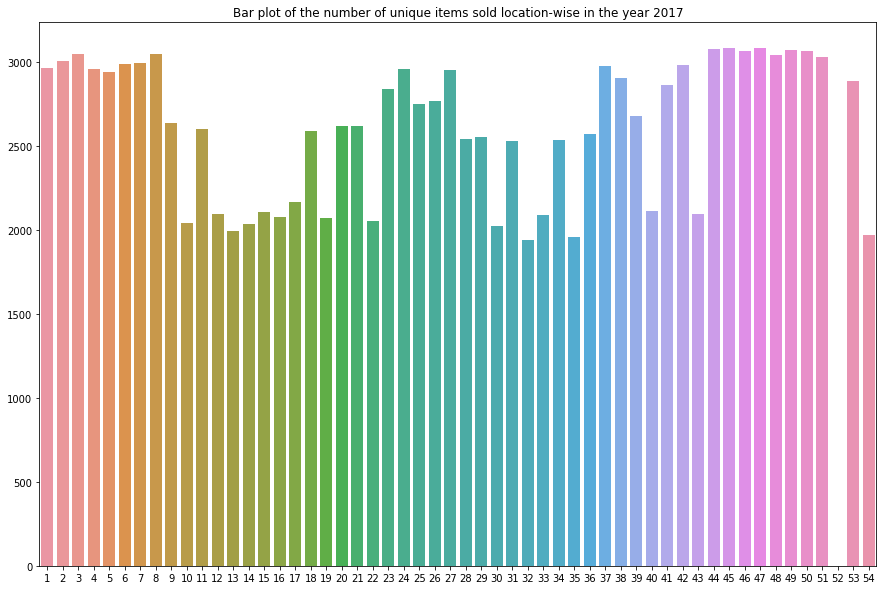

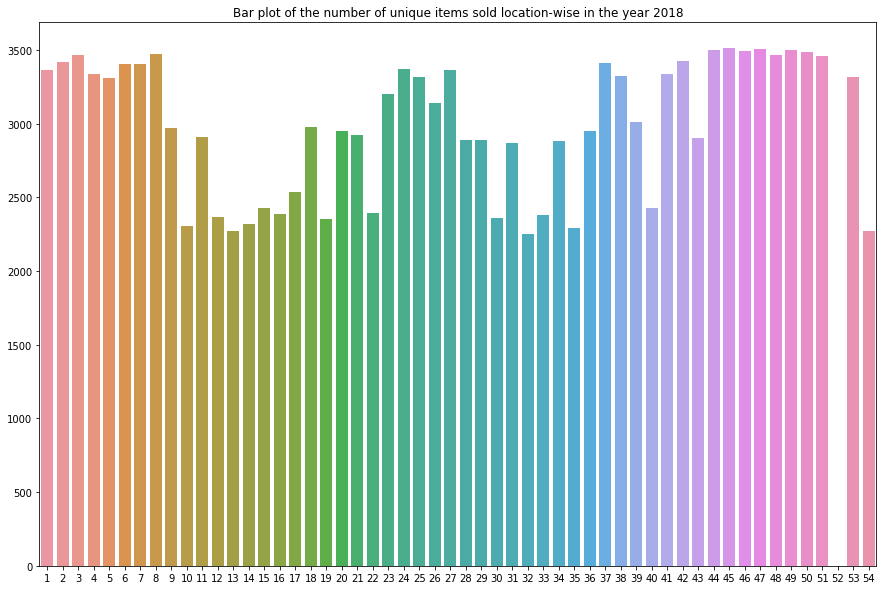

In [ ]:
def plot5():
  train_2015 = trainOpt[trainOpt["date"].dt.year == 2015]
  locs = np.arange(1, 55)
  items_loc = np.zeros((54, ))
  for i, l in enumerate(locs) :
    items_loc[i] = train_2015["item_id"][train_2015["locationId"] \
                                               == l].unique().shape[0]
  plt.figure(figsize=(15,10))
  sns.barplot(locs, items_loc)
  plt.title("Bar plot of the number of unique items sold location-wise in the year 2015")
  plt.show()
  print()

  train_2016 = trainOpt[trainOpt["date"].dt.year == 2016]
  locs = np.arange(1, 55)
  items_loc = np.zeros((54, ))
  for i, l in enumerate(locs) :
    items_loc[i] = train_2016["item_id"][train_2016["locationId"] \
                                               == l].unique().shape[0]
  plt.figure(figsize=(15,10))
  sns.barplot(locs, items_loc)
  plt.title("Bar plot of the number of unique items sold location-wise in the year 2016")
  plt.show()
  print()

  train_2017 = trainOpt[trainOpt["date"].dt.year == 2017]
  locs = np.arange(1, 55)
  items_loc = np.zeros((54, ))
  for i, l in enumerate(locs) :
    items_loc[i] = train_2017["item_id"][train_2017["locationId"] \
                                               == l].unique().shape[0]
  plt.figure(figsize=(15,10))
  sns.barplot(locs, items_loc)
  plt.title("Bar plot of the number of unique items sold location-wise in the year 2017")
  plt.show()
  print()

  train_2018 = trainOpt[trainOpt["date"].dt.year == 2018]
  locs = np.arange(1, 55)
  items_loc = np.zeros((54, ))
  for i, l in enumerate(locs) :
    items_loc[i] = train_2018["item_id"][train_2018["locationId"] \
                                               == l].unique().shape[0]
  plt.figure(figsize=(15,10))
  sns.barplot(locs, items_loc)
  plt.title("Bar plot of the number of unique items sold location-wise in the year 2018")
  plt.show()
  print()


plot5()

**Insight :** As expected, this is very similar to the last bar plot because it measures the variety of items in each location. Interestingly, if the number of items in a location in the plot is 0, it means the location doesn't exist/not active.

### Plot 6 : Scatter plot of unit sales year-wise

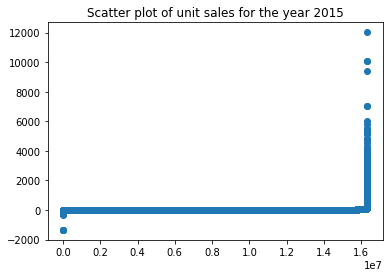

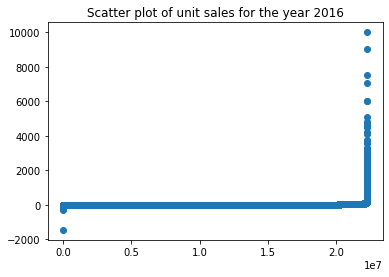

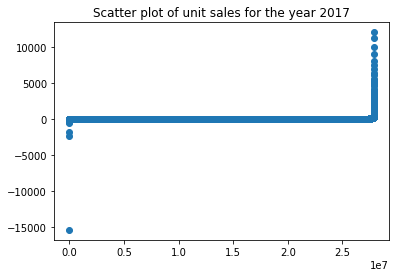

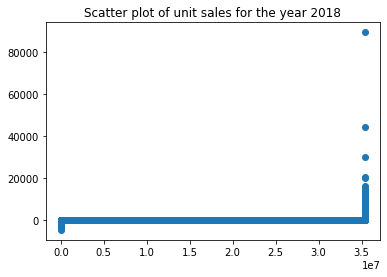

In [ ]:
def plot6():
  train_2015 = trainOpt[trainOpt["date"].dt.year == 2015]
  unit_sales = train_2015["unit_sales"].values
  plt.scatter(x = range(unit_sales.shape[0]), y = np.sort(unit_sales))
  plt.title("Scatter plot of unit sales for the year 2015")
  plt.show()
  print()

  train_2016 = trainOpt[trainOpt["date"].dt.year == 2016]
  unit_sales = train_2016["unit_sales"].values
  plt.scatter(x = range(unit_sales.shape[0]), y = np.sort(unit_sales))
  plt.title("Scatter plot of unit sales for the year 2016")
  plt.show()
  print()

  train_2017 = trainOpt[trainOpt["date"].dt.year == 2017]
  unit_sales = train_2017["unit_sales"].values
  plt.scatter(x = range(unit_sales.shape[0]), y = np.sort(unit_sales))
  plt.title("Scatter plot of unit sales for the year 2017")
  plt.show()
  print()

  train_2018 = trainOpt[trainOpt["date"].dt.year == 2018]
  unit_sales = train_2018["unit_sales"].values
  plt.scatter(x = range(unit_sales.shape[0]), y = np.sort(unit_sales))
  plt.title("Scatter plot of unit sales for the year 2018")
  plt.show()
  print()


plot6()

**Insight :** The above plot is useful in indicating outliers in unit sales data. The pattern is consistent for all the years.

### Plot 7 : Bar plot of the number of observations in each state year-wise

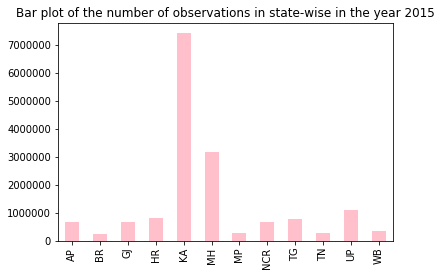

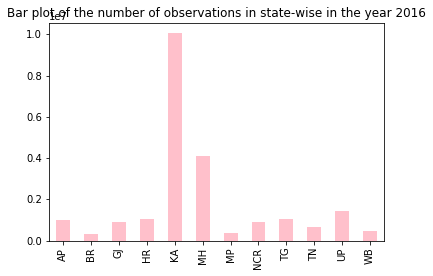

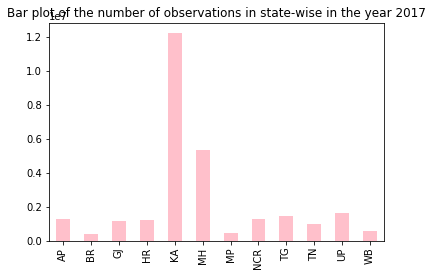

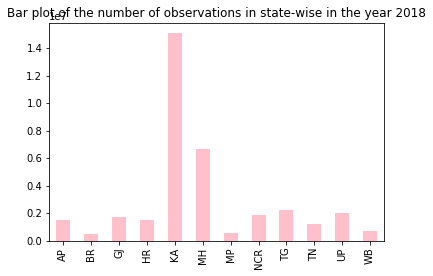

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["state"].value_counts(sort=False).plot.bar(color='pink')
plt.title("Bar plot of the number of observations in state-wise in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["state"].value_counts(sort=False).plot.bar(color='pink')
plt.title("Bar plot of the number of observations in state-wise in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["state"].value_counts(sort=False).plot.bar(color='pink')
plt.title("Bar plot of the number of observations in state-wise in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["state"].value_counts(sort=False).plot.bar(color='pink')
plt.title("Bar plot of the number of observations in state-wise in the year 2018")
plt.show()
print()

**Insight :** From the above plot, it is clear that the company's business size is different in different states with Karnataka being the largest followed by Maharashtra. The relative size between states remains the same across the four-year period.

### Plot 8 : Bar plot of the number of observations in each city year-wise

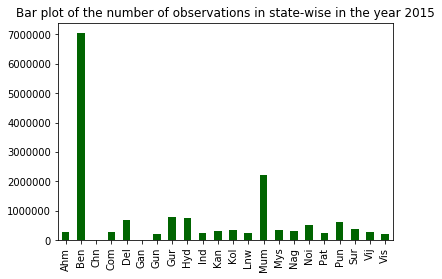

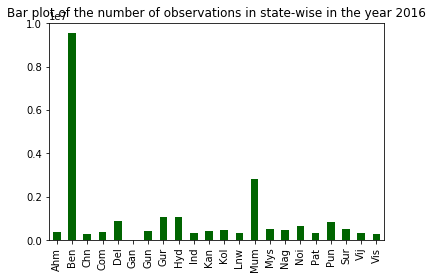

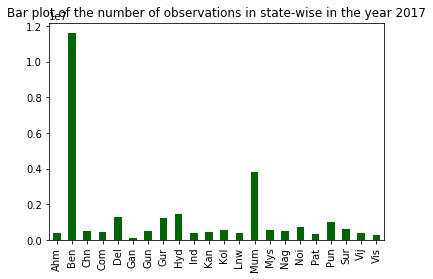

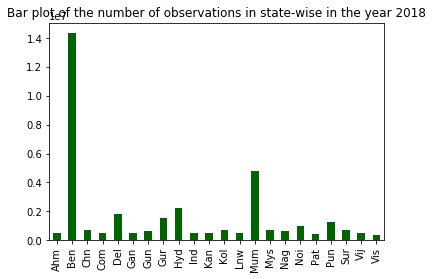

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["city"].value_counts(sort=False).plot.bar(color='darkgreen')
plt.title("Bar plot of the number of observations in state-wise in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["city"].value_counts(sort=False).plot.bar(color='darkgreen')
plt.title("Bar plot of the number of observations in state-wise in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["city"].value_counts(sort=False).plot.bar(color='darkgreen')
plt.title("Bar plot of the number of observations in state-wise in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["city"].value_counts(sort=False).plot.bar(color='darkgreen')
plt.title("Bar plot of the number of observations in state-wise in the year 2018")
plt.show()
print()

**Insight :** Analogous to the previous plot, it is clear that the company's business size is different in different cities with Bengaluru (capital of Karnataka) being the largest followed by Mumbai (Maharashtra). The relative size between cities remains the same across the four-year period.

### Plot 9 : Bar plot of the number of observations falling into each cluster year-wise

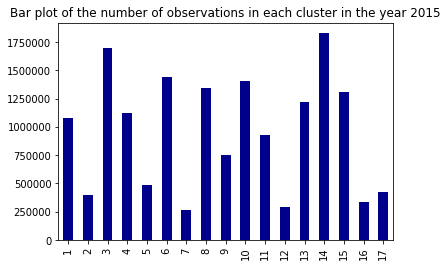

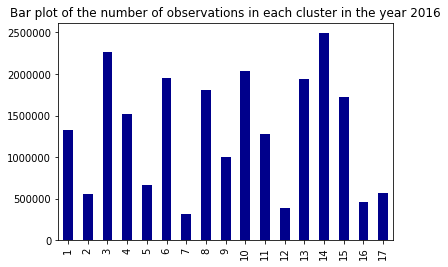

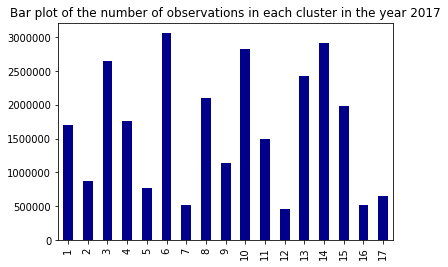

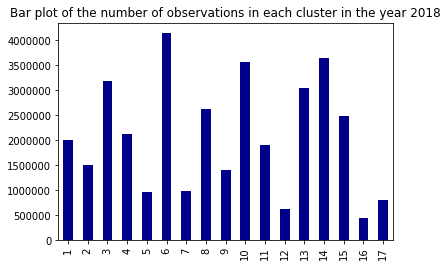

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["cluster"].value_counts(sort=False).plot.bar(color='darkblue')
plt.title("Bar plot of the number of observations in each cluster in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["cluster"].value_counts(sort=False).plot.bar(color='darkblue')
plt.title("Bar plot of the number of observations in each cluster in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["cluster"].value_counts(sort=False).plot.bar(color='darkblue')
plt.title("Bar plot of the number of observations in each cluster in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["cluster"].value_counts(sort=False).plot.bar(color='darkblue')
plt.title("Bar plot of the number of observations in each cluster in the year 2018")
plt.show()
print()

**Insight :**  From the above plot, it is clear that the company's business size is different in different clusters with D being the largest followed by A. The relative size between clusters remains the same across the four-year period.

### Plot 10 : Bar plot of the number of observations falling into each location type year-wise

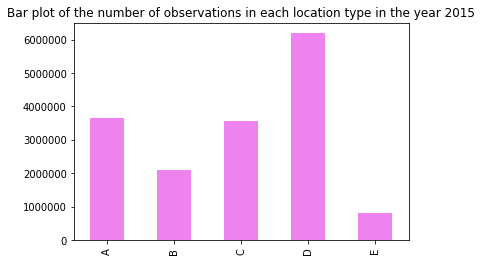

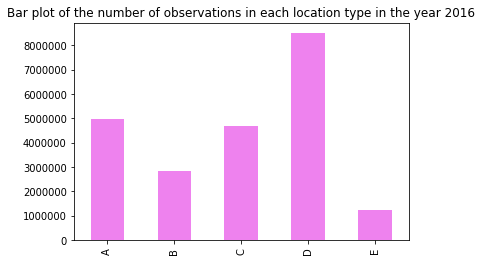

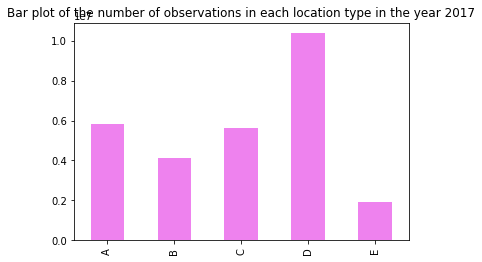

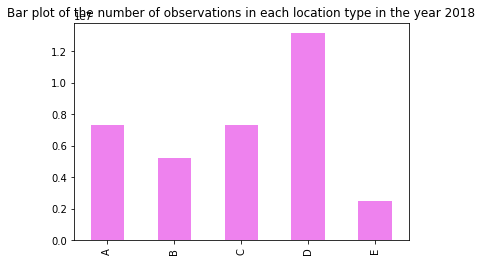

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["type"].value_counts(sort=False).plot.bar(color='violet')
plt.title("Bar plot of the number of observations in each location type in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["type"].value_counts(sort=False).plot.bar(color='violet')
plt.title("Bar plot of the number of observations in each location type in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["type"].value_counts(sort=False).plot.bar(color='violet')
plt.title("Bar plot of the number of observations in each location type in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["type"].value_counts(sort=False).plot.bar(color='violet')
plt.title("Bar plot of the number of observations in each location type in the year 2018")
plt.show()
print()

**Insight :**  From the above plot, it is clear that the company's business size is different in different location types with D being the largest followed by A. The relative size between location types remains the same across the four-year period.

### Plot 11 : Bar plot of the number of observations falling into each category of item year-wise

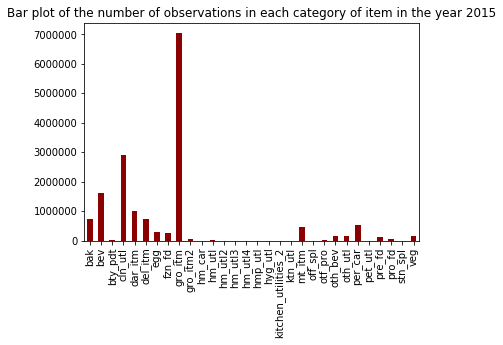

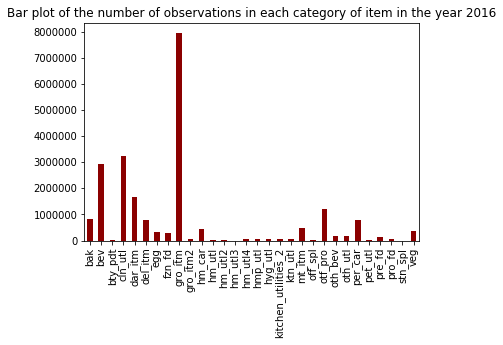

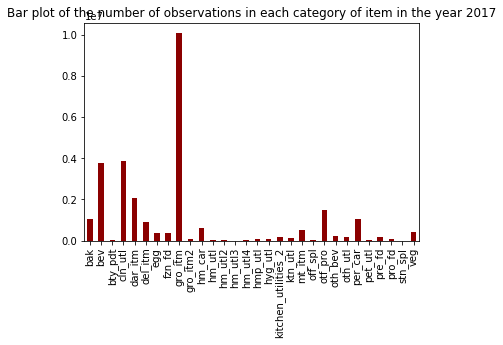

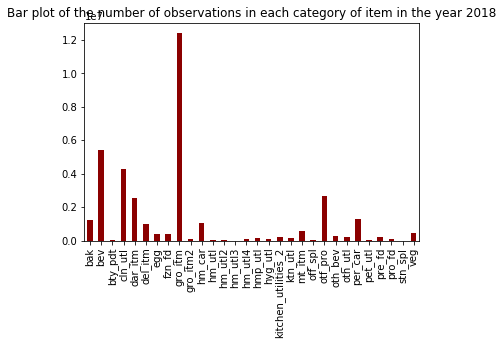

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["category_of_item"].value_counts(sort=False).plot.bar(color='darkred')
plt.title("Bar plot of the number of observations in each category of item in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["category_of_item"].value_counts(sort=False).plot.bar(color='darkred')
plt.title("Bar plot of the number of observations in each category of item in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["category_of_item"].value_counts(sort=False).plot.bar(color='darkred')
plt.title("Bar plot of the number of observations in each category of item in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["category_of_item"].value_counts(sort=False).plot.bar(color='darkred')
plt.title("Bar plot of the number of observations in each category of item in the year 2018")
plt.show()
print()

**Insight :**  From the above plot, it is clear that the company is predominantly involved in grocery items. The relative size between item categories remains the same across the four-year period.

### Plot 12 : Histogram of distribution of class of items

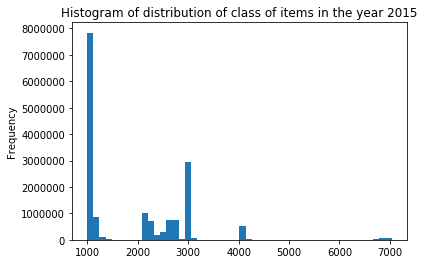

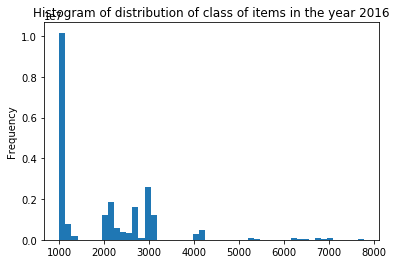

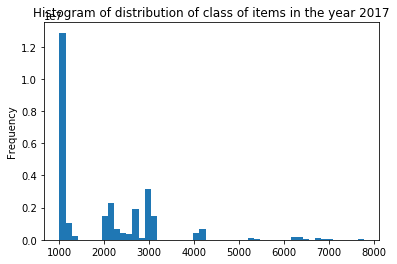

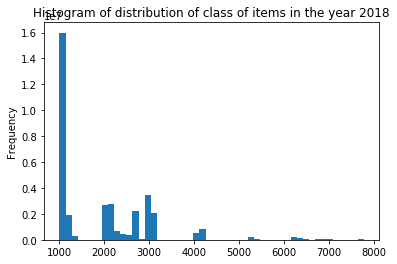

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["class"].plot.hist(bins = 50)
plt.title("Histogram of distribution of class of items in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["class"].plot.hist(bins = 50)
plt.title("Histogram of distribution of class of items in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["class"].plot.hist(bins = 50)
plt.title("Histogram of distribution of class of items in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["class"].plot.hist(bins = 50)
plt.title("Histogram of distribution of class of items in the year 2018")
plt.show()
print()

### Plot 13 : Histogram of number of transactions in each year

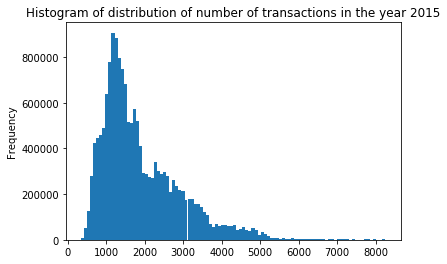

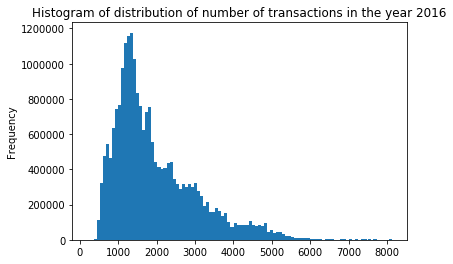

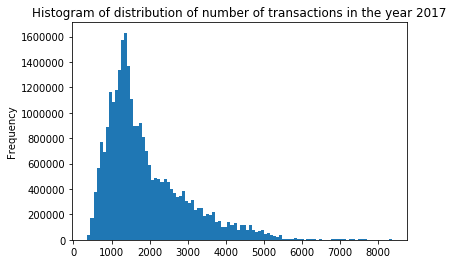

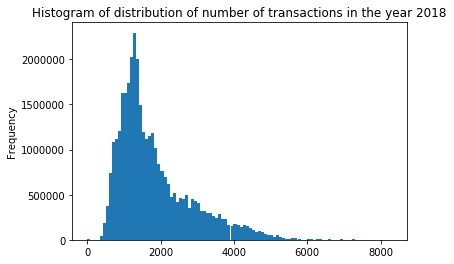

In [ ]:
trainOpt[trainOpt["date"].dt.year==2015]["transactions"].plot.hist(bins = 100)
plt.title("Histogram of distribution of number of transactions in the year 2015")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2016]["transactions"].plot.hist(bins = 100)
plt.title("Histogram of distribution of number of transactions in the year 2016")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2017]["transactions"].plot.hist(bins = 100)
plt.title("Histogram of distribution of number of transactions in the year 2017")
plt.show()
print()

trainOpt[trainOpt["date"].dt.year==2018]["transactions"].plot.hist(bins = 100)
plt.title("Histogram of distribution of number of transactions in the year 2018")
plt.show()
print()

**Insight :** The histogram plot for each year shows a similar pattern for all years. The curve formed by the histograms is skewed to the right indicating outliers at high number of transactions.

### Plot 14 : Count plot of Location ID column for the entire 4 year period

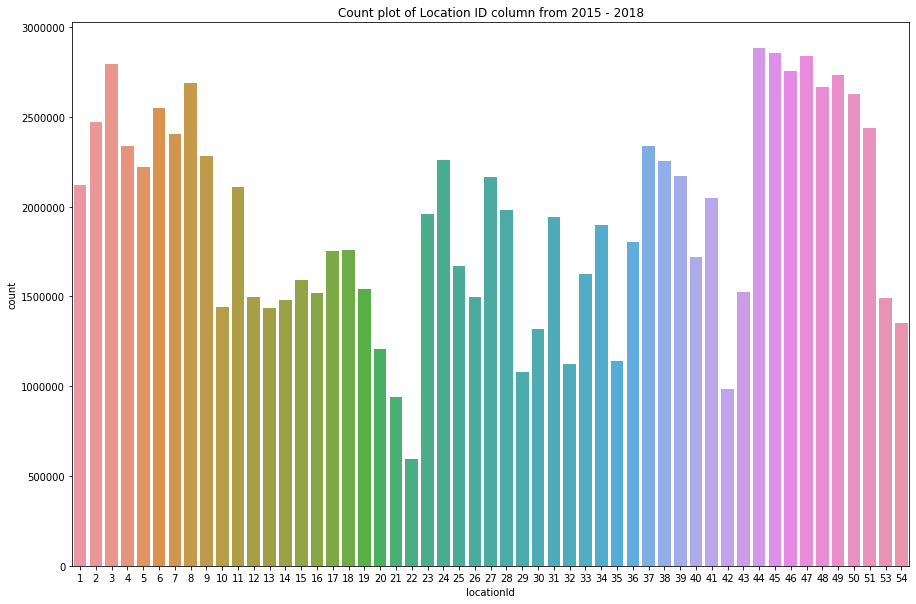

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="locationId",data=trainOpt)
plt.title("Count plot of Location ID column from 2015 - 2018")
plt.show()

### Plot 15 : Count plot of On promotion column for the entire 4 year period


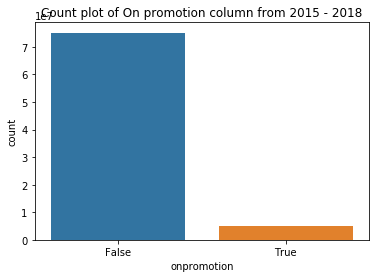

In [ ]:
sns.countplot(x="onpromotion",data=trainOpt)
plt.title("Count plot of On promotion column from 2015 - 2018")
plt.show()

### Plot 16 : Count plot of Category of item column for the entire 4 year period

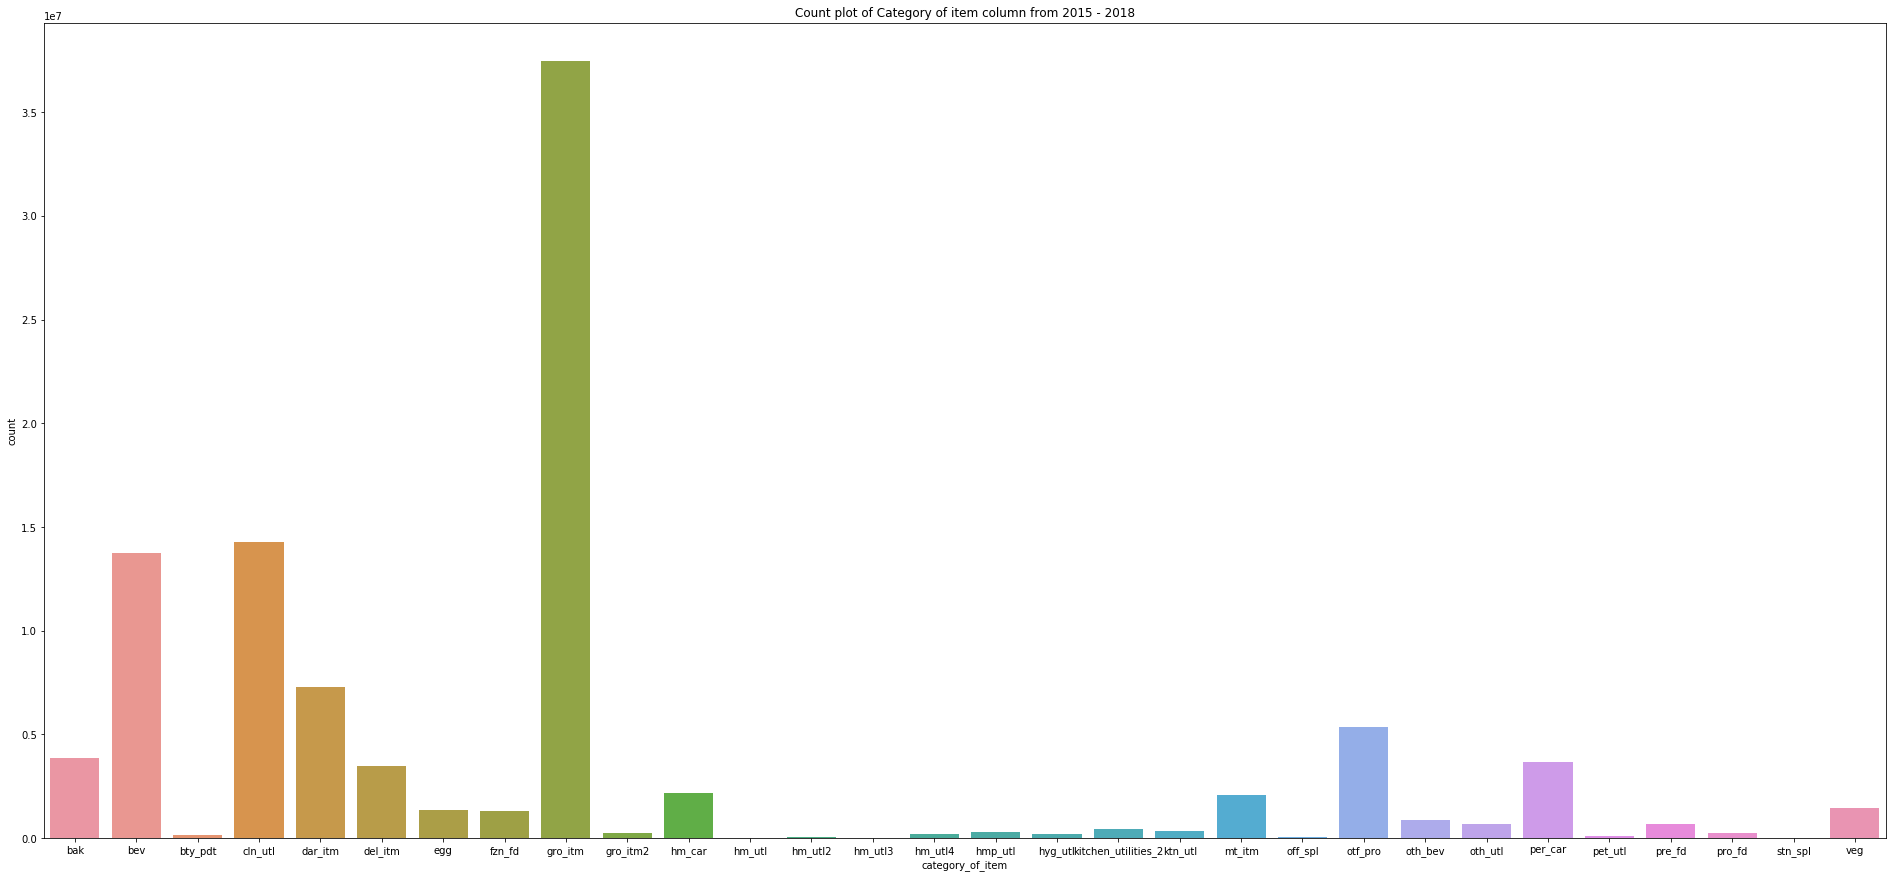

In [ ]:
plt.figure(figsize=(33,15))
sns.countplot(x="category_of_item",data=trainOpt)
plt.title("Count plot of Category of item column from 2015 - 2018")
plt.show()

### Plot 17 : Count plot of Perishable column for the entire 4 year period

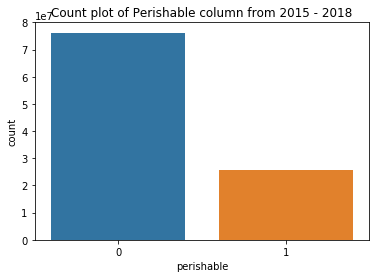

In [ ]:
sns.countplot(x="perishable",data=trainOpt)
plt.title("Count plot of Perishable column from 2015 - 2018")
plt.show()

### Plot 18 : Count plot of State column for the entire 4 year period

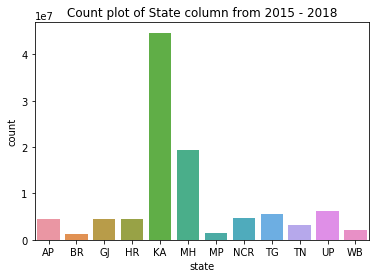

In [ ]:
sns.countplot(x="state",data=trainOpt)
plt.title("Count plot of State column from 2015 - 2018")
plt.show()

### Plot 19 : Count plot of City column for the entire 4 year period

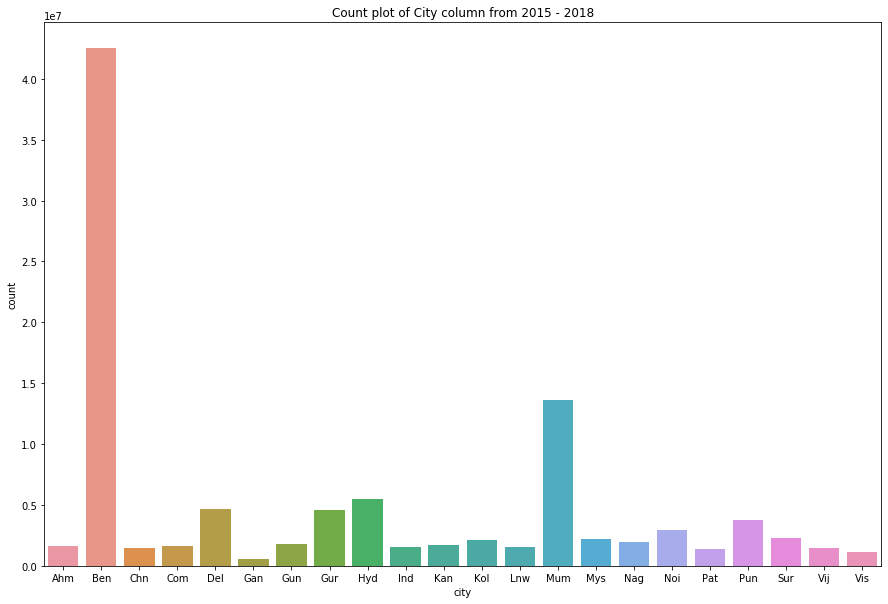

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="city",data=trainOpt)
plt.title("Count plot of City column from 2015 - 2018")
plt.show()

### Plot 20 : Count plot of Cluster column for the entire 4 year period

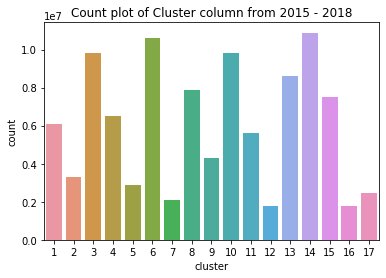

In [ ]:
sns.countplot(x="cluster",data=trainOpt)
plt.title("Count plot of Cluster column from 2015 - 2018")
plt.show()

### Plot 21 : Count plot of Type column for the entire 4 year period

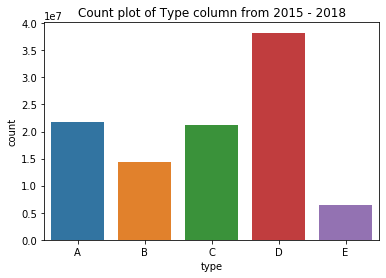

In [ ]:
sns.countplot(x="type",data=trainOpt)
plt.title("Count plot of Type column from 2015 - 2018")
plt.show()

### Plot 22 : Count plot of perishable items for different categories of items

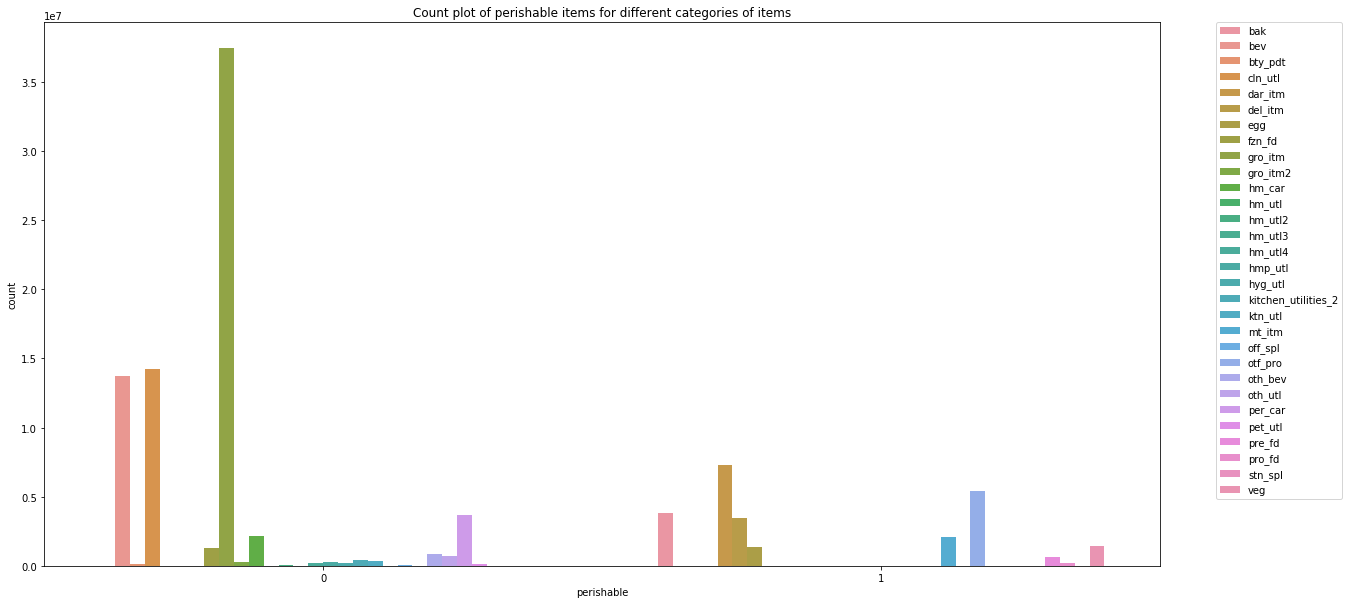

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="perishable",hue="category_of_item",data=trainOpt)
plt.title("Count plot of perishable items for different categories of items")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.show()

### Plot 23 : Count plot of category of items based on promotion

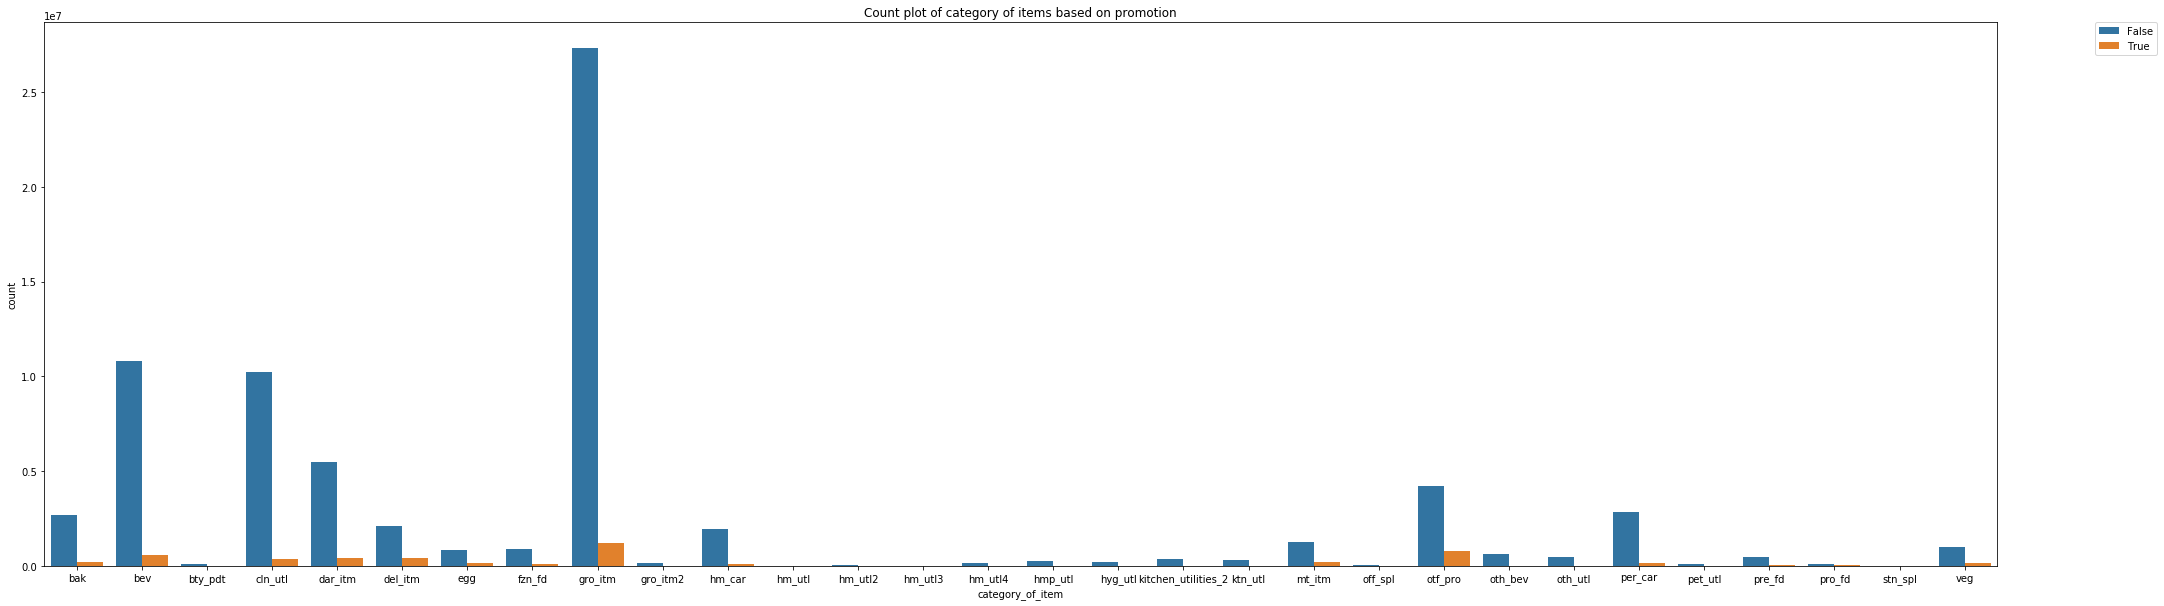

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(x="category_of_item",hue="onpromotion",data=trainOpt)
plt.title("Count plot of category of items based on promotion")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.show()

### Plot 24 : Count plot of states based on promotion

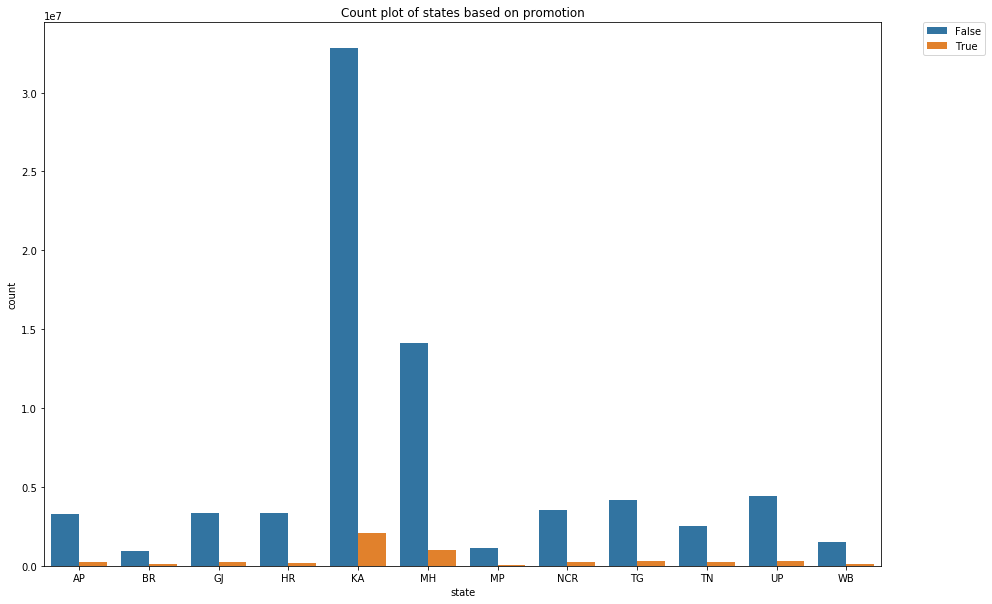

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="state",hue="onpromotion",data=trainOpt)
plt.title("Count plot of states based on promotion")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.show()

### Plot 25 : Count plot of cities based on promotion

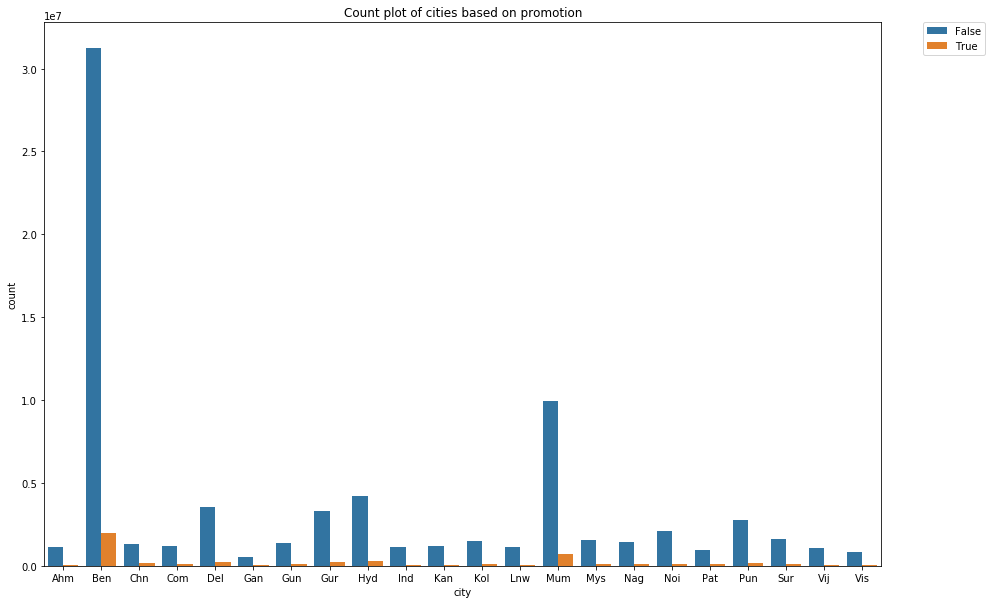

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="city",hue="onpromotion",data=trainOpt)
plt.title("Count plot of cities based on promotion")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.show()

### Plot 26 : Stacked Bar Plot of Types against Clusters

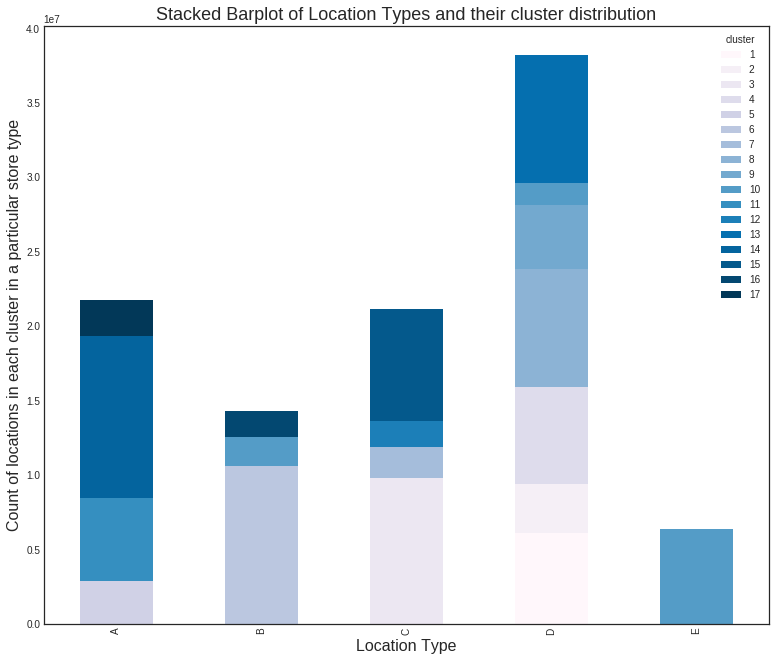

In [ ]:
def plot26():
  locs=trainOpt.loc[:,["locationId","cluster","type"]]

  plt.style.use('seaborn-white')
  type_cluster = locs.groupby(['type','cluster']).size()
  type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
  plt.title('Stacked Barplot of Location Types and their cluster distribution', fontsize=18)
  plt.ylabel('Count of locations in each cluster in a particular store type', fontsize=16)
  plt.xlabel('Location Type', fontsize=16)
  plt.show()


plot26()

**Insight :** Most of the location types seem to contain a mix of the clusters, especially with regards to location type "D". Only type "E" locations seem to fall within the single cluster of cluster 10. However with regards to our initial plan of trying to suss out relationships between location types and clusters, it seems that there is nothing apparent that stands out. If we think of store types, one would normally think of categories such as convenience store types, huge general store types or bulk buy types.

### Plot 27 : Stacked Bar Plot of Locations across different Cities & Location Types

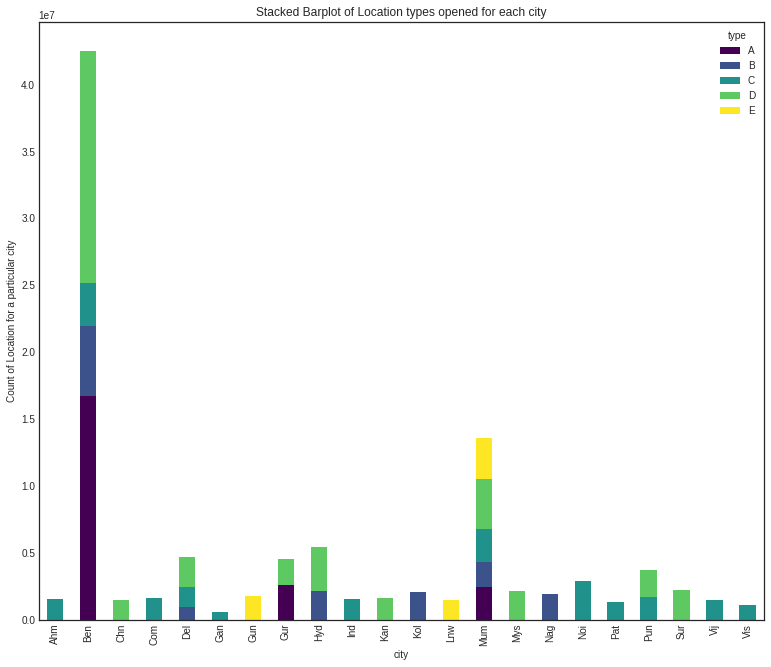

In [ ]:
def plot27():
  locs=trainOpt.loc[:,["locationId","city","type"]]

  plt.style.use('seaborn-white')
  city_type = locs.groupby(['city','type']).locationId.size()
  city_type.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
  plt.title('Stacked Barplot of Location Types and their city-wise distribution', fontsize=18)
  plt.title('Stacked Barplot of Location types opened for each city')
  plt.ylabel('Count of Location for a particular city')
  plt.show()


plot27()

**Insight :** As observed from the stacked barplots, there are two cities that standout in terms of the variety of location types on offer - Bengaluru and Mumbai. These should come as no surprise as Bengaluru is the IT capital of India with a tech-savvy population while Mumbai is the financial capital of India. Therefore one would think it logical to expect Small Basket to target these major cities with the most diverse location types probably to capture different ends of the market (if we think location types as being high-end/premium/wholesale/discount etc) as well as opening up the highest number of locations evinced from the largest counts of locationId's attributed to those two cities.

### Plot 28 : Distribution of transactions per day from 2015 to 2018

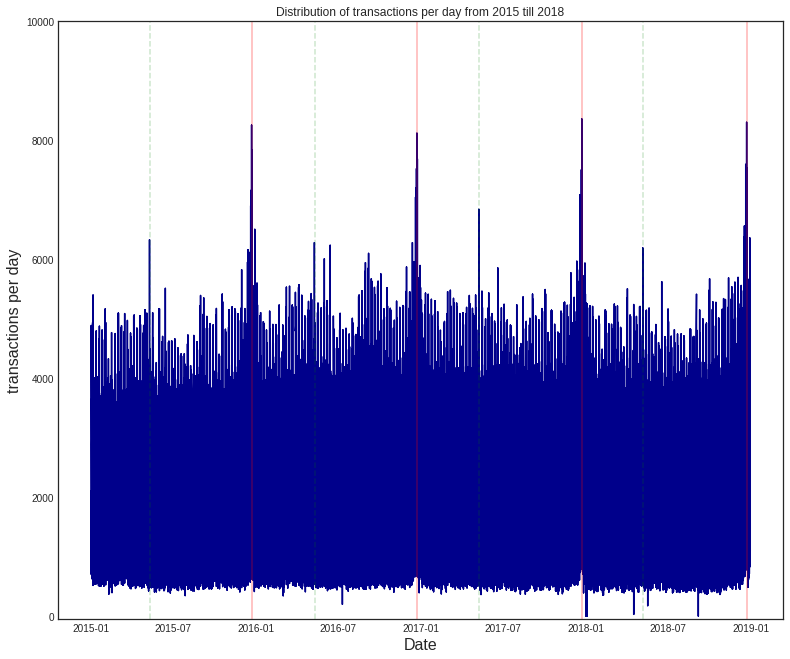

In [ ]:
def plot28():
  transactions=trainOpt.loc[:,["date","transactions"]]

  plt.style.use('seaborn-white')
  plt.figure(figsize=(13,11))
  plt.plot(transactions.date.values,transactions.transactions.values, color='darkblue')
  plt.axvline(x='2017-12-23',color='red',alpha=0.3)
  plt.axvline(x='2018-12-23',color='red',alpha=0.3)
  plt.axvline(x='2016-12-23',color='red',alpha=0.3)
  plt.axvline(x='2015-12-23',color='red',alpha=0.3)
  plt.axvline(x='2015-05-12',color='green',alpha=0.2, linestyle= '--')
  plt.axvline(x='2017-05-10',color='green',alpha=0.2, linestyle= '--')
  plt.axvline(x='2018-05-08',color='green',alpha=0.2, linestyle= '--')
  plt.axvline(x='2016-05-11',color='green',alpha=0.2, linestyle= '--')
  plt.ylim(-50, 10000)
  plt.title("Distribution of transactions per day from 2015 till 2018")
  plt.ylabel('transactions per day', fontsize= 16)
  plt.xlabel('Date', fontsize= 16)
  plt.show()


plot28()

**Insight :** Interestingly when plotting transactions on a year-to-year basis, we can already pick out two different periodic spikes in transactions from the data (one in the solid Red line and the other the dotted Green line). The bigger yearly periodic spike in transactions seem to occur at the end of the year in December, specifically on the 23 December every year-end. Perhaps this is due to some sort of Christmas sale/discount that Small Basket holds every December thereby explaining the bump in transactions on this date. The weaker periodic spike given by the green dotted lines seems to occur around the middle of the months of May, specifically on the sunday in the second week of May. Perhaps another similar scheme is being implemented by Small Basket on those sundays.

### Plot 29 : Stacked Bar Plot of Locations across different Cities & Location Types

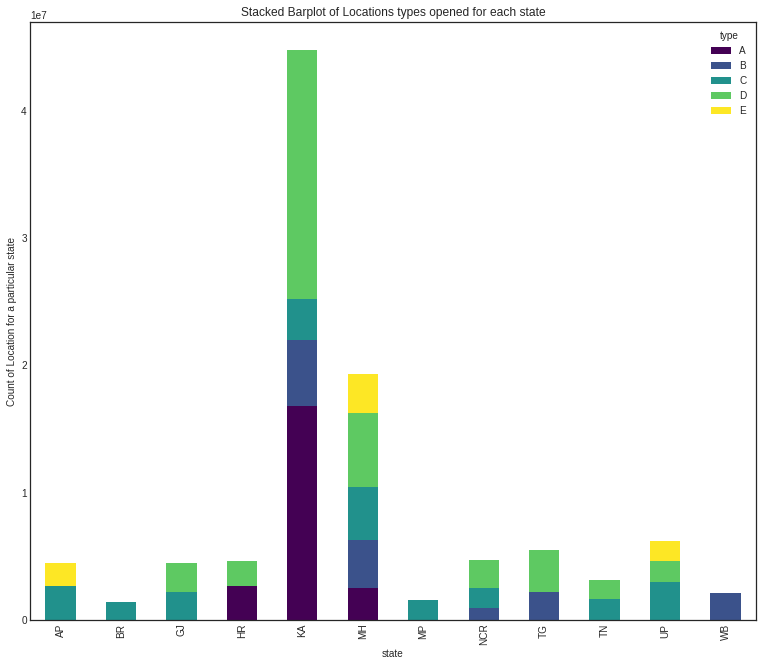

In [ ]:
def plot29():
  locs=trainOpt.loc[:,["locationId","state","type"]]

  plt.style.use('seaborn-white')
  city_type = locs.groupby(['state','type']).locationId.size()
  city_type.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
  plt.title('Stacked Barplot of Location Types and their state-wise distribution', fontsize=18)
  plt.title('Stacked Barplot of Locations types opened for each state')
  plt.ylabel('Count of Location for a particular state')
  plt.show()


plot29()

**Insight :** As observed from the stacked barplots, there are two states that standout in terms of the variety of location types on offer - Karnataka and Maharashtra. These should come as no surprise as Bengaluru is the capital of Karnataka while Mumbai is the capital of Maharashtra.

### Plot 30 : Treemap of store counts across different cities

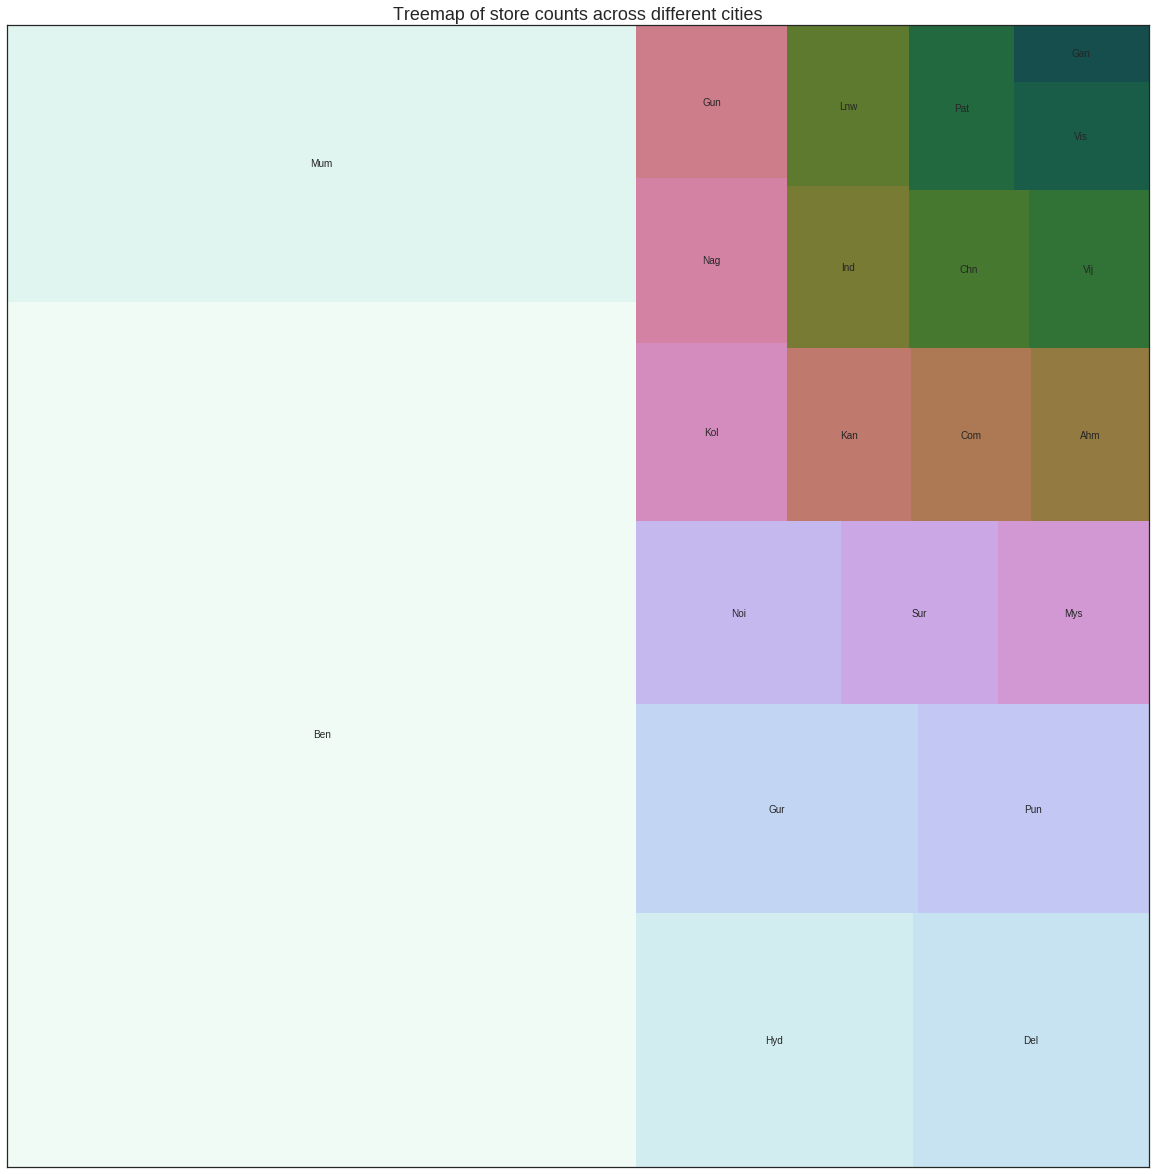

In [ ]:
!pip install squarify
import squarify
def plot30():
  locs=trainOpt.loc[:,["locationId","state","city","cluster","type"]]

  fig = plt.figure(figsize=(30, 25))
  ko=locs.city.value_counts().to_frame()
  ax = fig.add_subplot(111, aspect="equal")
  ax = squarify.plot(sizes=ko['city'].values,label=ko.index,
                color=sns.color_palette('cubehelix_r', 28), alpha=1)
  ax.set_xticks([])
  ax.set_yticks([])
  fig=plt.gcf()
  fig.set_size_inches(25,21)
  plt.title("Treemap of store counts across different cities", fontsize=18)
  plt.show();


plot30()

### Plot 31 : Treemap of store counts across different states

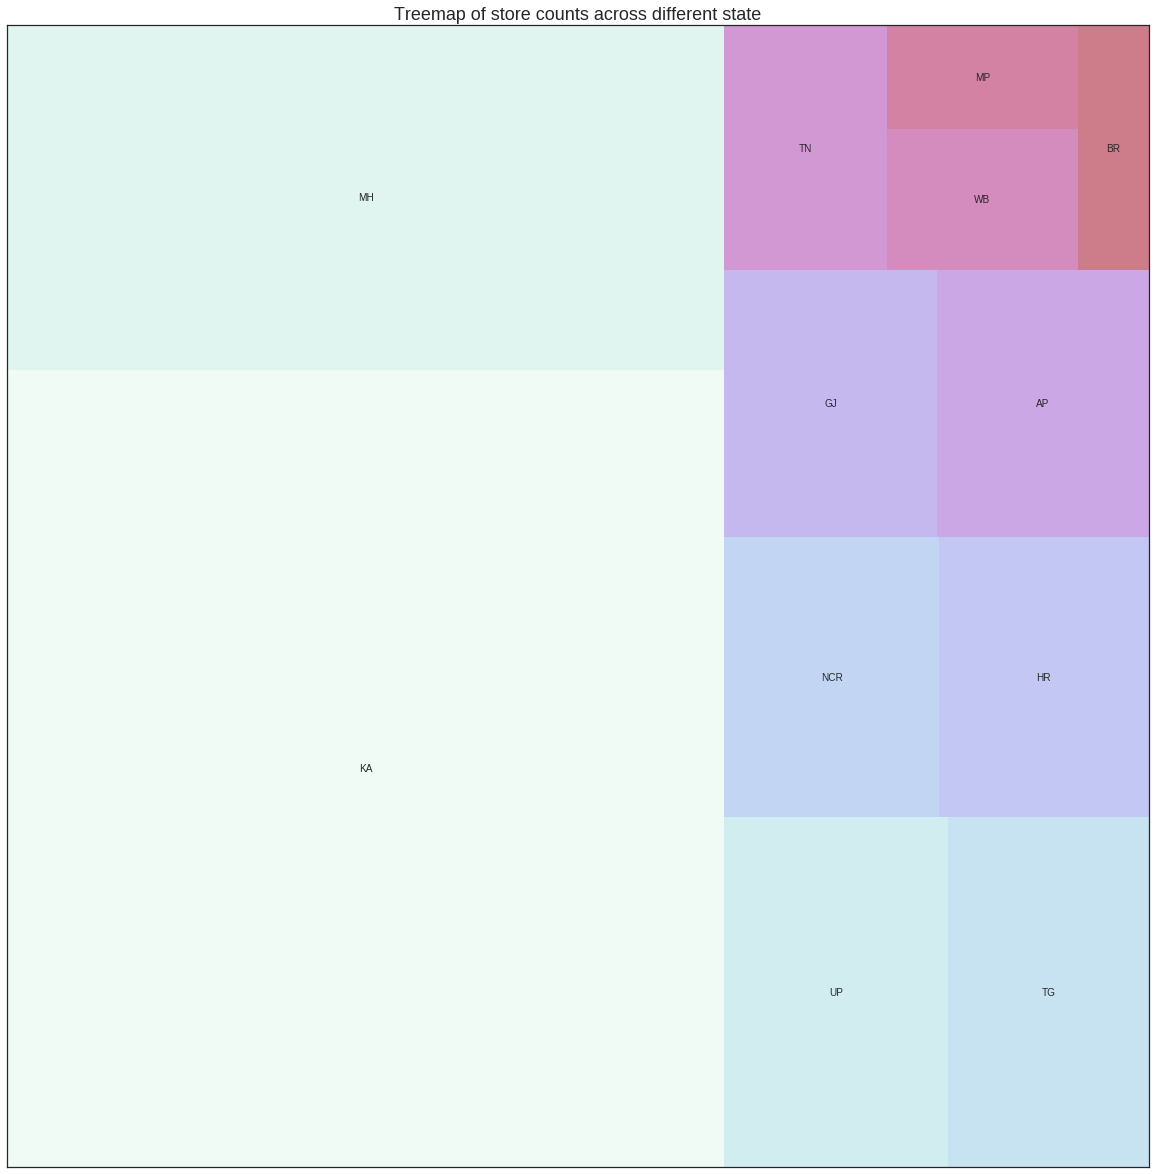

In [ ]:
!pip install squarify
import squarify
def plot31():
  locs=trainOpt.loc[:,["locationId","state","city","cluster","type"]]

  fig = plt.figure(figsize=(30, 25))
  ko=locs.state.value_counts().to_frame()
  ax = fig.add_subplot(111, aspect="equal")
  ax = squarify.plot(sizes=ko['state'].values,label=ko.index,
                color=sns.color_palette('cubehelix_r', 28), alpha=1)
  ax.set_xticks([])
  ax.set_yticks([])
  fig=plt.gcf()
  fig.set_size_inches(25,21)
  plt.title("Treemap of store counts across different state", fontsize=18)
  plt.show();


plot31()



---

---









## **8. Preliminary Time Series Analysis**

### A. Considering only time by approximating daily value of unit sales by using the **mean** sales of daily value

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objects as go

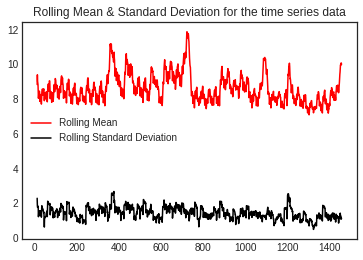

In [ ]:
def ts_plot():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()

  plot_data=[
      go.Scatter(
          x=train_daily['date'],
          y=train_daily['unit_sales'],
      )
  ]

  plot_layout=go.Layout(
      title='Daily unit sales across the 4-year period'
      )

  fig=go.Figure(data=plot_data,layout=plot_layout)
  pyoff.iplot(fig)

  rolling_mean=train_daily.rolling(window=12).mean()
  rolling_std=train_daily.rolling(window=12).std()

  plt.plot(rolling_mean,color='red',label='Rolling Mean')
  plt.plot(rolling_std,color='black',label='Rolling Standard Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation for the time series data')
  plt.show(block=False)


ts_plot()

**Insight :** Time series data is somewhat stationary as mean and variance are not varying much with time. There is some seasonal variation in mean.


In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def dickeyFuller():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()

  print("Results of Dickey-Fuller Test :")
  dftest=adfuller(train_daily["unit_sales"],autolag='AIC')

  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

  print(dfoutput)


dickeyFuller()

Results of Dickey-Fuller Test :
Test Statistic                -5.811972e+00
p-value                        4.380024e-07
Lags Used                      2.200000e+01
Number of Observations Used    1.433000e+03
Critical Value (1%)           -3.434922e+00
Critical Value (5%)           -2.863559e+00
Critical Value (10%)          -2.567845e+00
dtype: float64


**Insight :** Time Series data is stationary as p-value < 0.05.

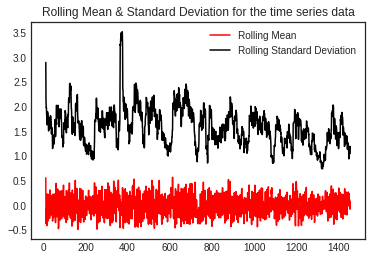

In [ ]:
def plot_diff1():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()
  train_diff = train_daily.copy()
  train_diff['prev_sales'] = train_diff['unit_sales'].shift(1)
  train_diff['diff'] = (train_diff['unit_sales'] - train_diff['prev_sales'])
  train_diff.head(10)

  plot_data = [
      go.Scatter(
          x=train_diff['date'],
          y=train_diff['diff'],
      )
  ]

  plot_layout = go.Layout(
          title='1st Non-Seasonal Difference of Daily Sales'
      )

  fig = go.Figure(data=plot_data, layout=plot_layout)
  pyoff.iplot(fig)

  rolling_mean=train_diff["diff"].rolling(window=12).mean()
  rolling_std=train_diff["diff"].rolling(window=12).std()

  plt.plot(rolling_mean,color='red',label='Rolling Mean')
  plt.plot(rolling_std,color='black',label='Rolling Standard Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation for the time series data')
  plt.show(block=False)


plot_diff1()

**Insight :** Time series data is highly stationary as mean and variance are not varying with time.

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def dickeyFuller():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()
  train_diff = train_daily.copy()
  train_diff['prev_sales'] = train_diff['unit_sales'].shift(1)
  train_diff['diff'] = (train_diff['unit_sales'] - train_diff['prev_sales'])
  train_diff.loc[0,"diff"]=0

  print("Results of Dickey-Fuller Test :")
  dftest=adfuller(train_diff["diff"],autolag='AIC')

  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

  print(dfoutput)


dickeyFuller()

Results of Dickey-Fuller Test :
Test Statistic                -1.057085e+01
p-value                        7.312190e-19
Lags Used                      2.400000e+01
Number of Observations Used    1.431000e+03
Critical Value (1%)           -3.434928e+00
Critical Value (5%)           -2.863562e+00
Critical Value (10%)          -2.567846e+00
dtype: float64


**Insight :** Time Series data is highly stationary as p-value is very small.

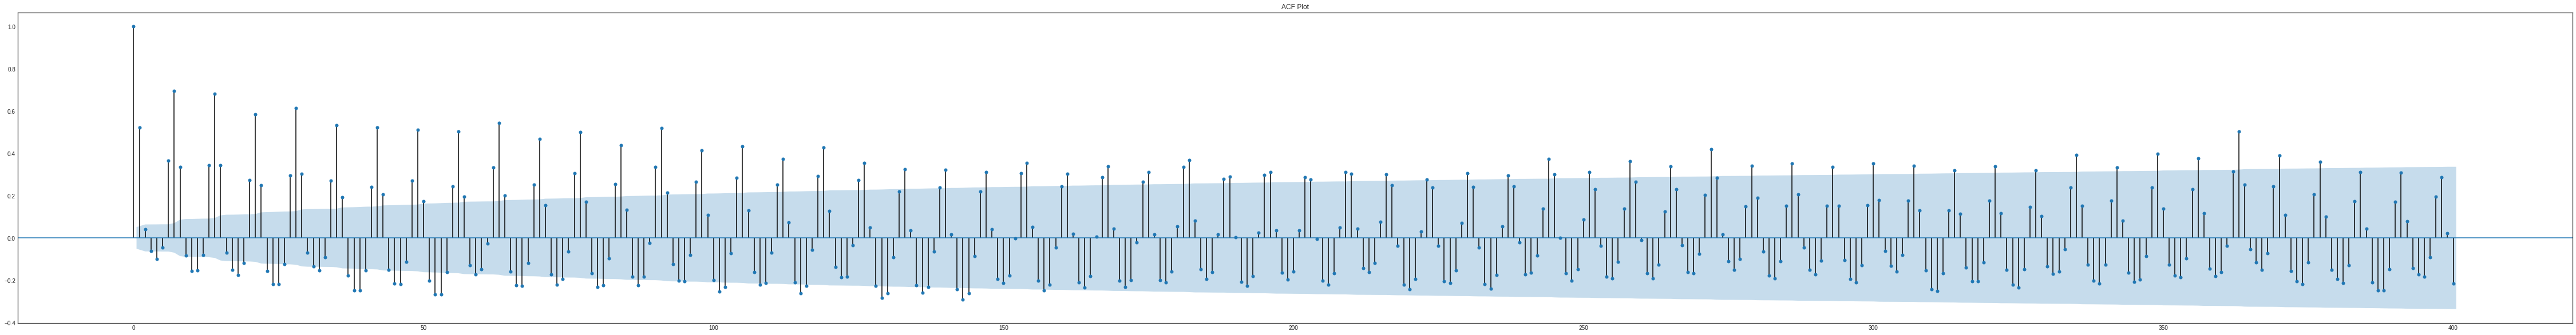

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_plot():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()
  fig,ax=plt.subplots(figsize=(80,10))
  plot_acf(train_daily["unit_sales"],lags=400,title="ACF Plot",ax=ax)
  plt.show()


acf_plot()

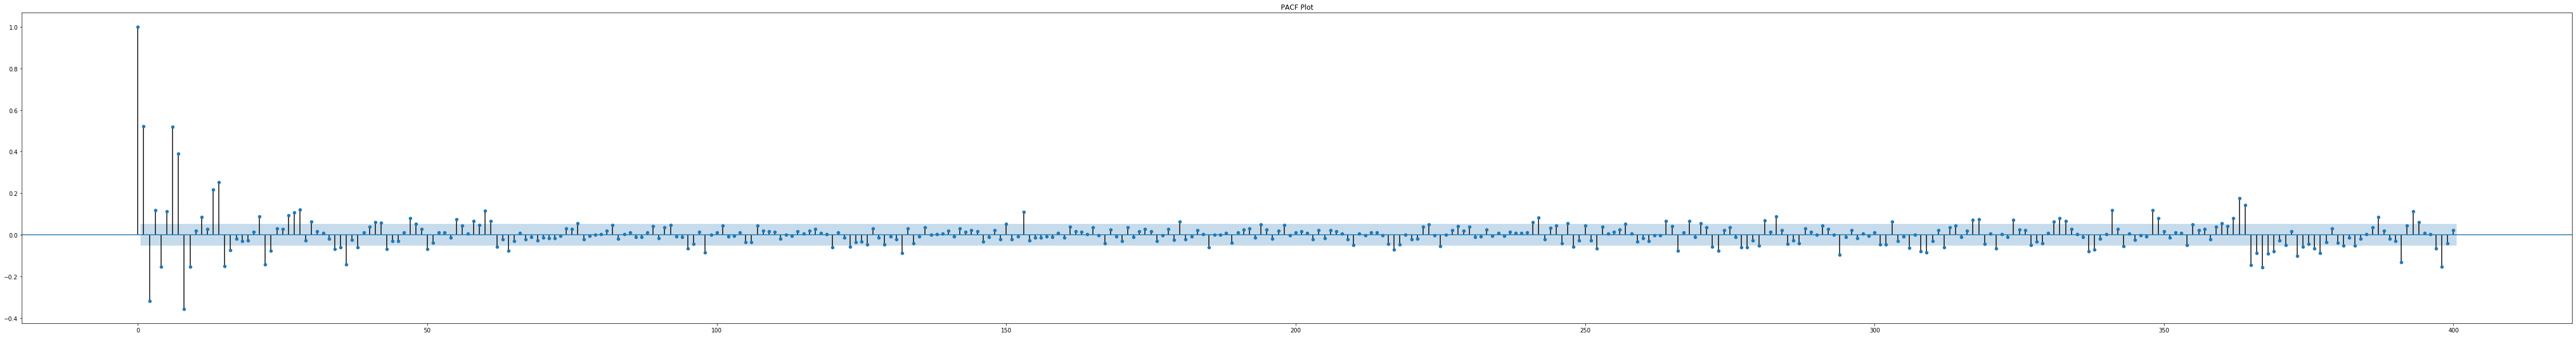

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def pacf_plot():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()
  fig,ax=plt.subplots(figsize=(80,10))
  plot_pacf(train_daily["unit_sales"],lags=400,title="PACF Plot",ax=ax)
  plt.show()


pacf_plot()

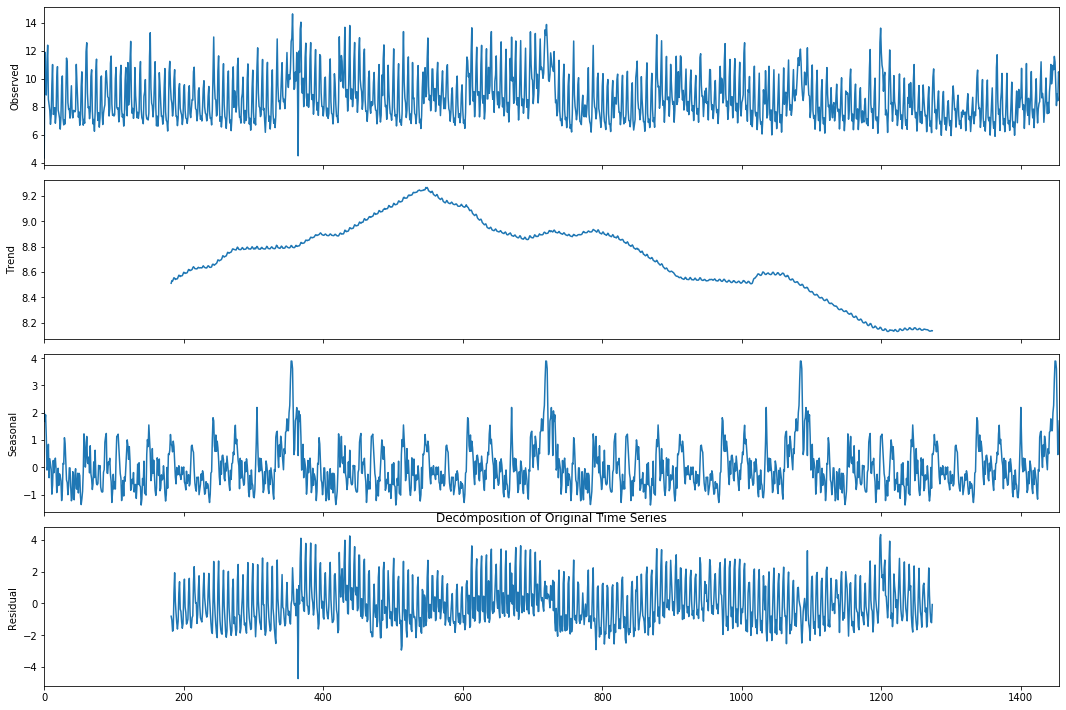

In [ ]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

def ts_decomposition():
  train_daily=trainOpt.groupby('date').unit_sales.mean().reset_index()

  plt.rcParams['figure.figsize']=(15,10)
  decomposition = seasonal_decompose(train_daily["unit_sales"],freq=365) # The frequncy is annual
  decomposition.plot()
  plt.title("Decomposition of Original Time Series")
  plt.show()

ts_decomposition()

**Insight :** It appears that the trend for mean of unit sales in a day is largely decreasing although the overall trend through previous visualizations (Plot 1 - Yearly total sales) indicates a growth in total unit sales every year (growth in business). This means that time alone cannot explain the variation in unit sales and other exogenous variables have to be considered.

There appears to be seasonality in the data with a time period of 1 year.

### B. Considering only time by approximating daily value of unit sales by using **sum** sales of daily value

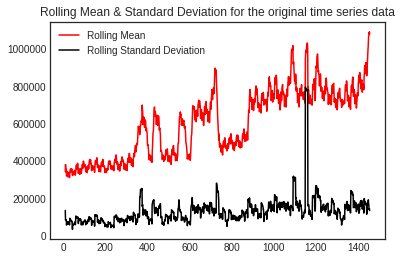

In [ ]:
def ts_plot():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()

  plot_data=[
      go.Scatter(
          x=train_daily['date'],
          y=train_daily['unit_sales'],
      )
  ]

  plot_layout=go.Layout(
      title='Daily unit sales across the 4-year period'
      )

  fig=go.Figure(data=plot_data,layout=plot_layout)
  pyoff.iplot(fig)

  rolling_mean=train_daily.rolling(window=12).mean()
  rolling_std=train_daily.rolling(window=12).std()

  plt.plot(rolling_mean,color='red',label='Rolling Mean')
  plt.plot(rolling_std,color='black',label='Rolling Standard Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation for the original time series data')
  plt.show(block=False)


ts_plot()

**Insight :** Time series data is not stationary as mean and variance are varying a lot much with time.

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def dickeyFuller():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()

  print("Results of Dickey-Fuller Test :")
  dftest=adfuller(train_daily["unit_sales"],autolag='AIC')

  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

  print(dfoutput)


dickeyFuller()

Results of Dickey-Fuller Test :
Test Statistic                   -2.000534
p-value                           0.286339
Lags Used                        22.000000
Number of Observations Used    1433.000000
Critical Value (1%)              -3.434922
Critical Value (5%)              -2.863559
Critical Value (10%)             -2.567845
dtype: float64


**Insight :** Time Series data is not stationary as p-value > 0.05.

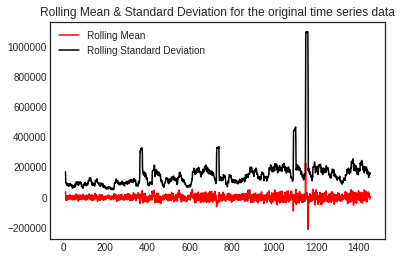

In [ ]:
def plot_diff1():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()
  train_diff = train_daily.copy()
  train_diff['prev_sales'] = train_diff['unit_sales'].shift(1)
  train_diff['diff'] = (train_diff['unit_sales'] - train_diff['prev_sales'])
  train_diff.head(10)

  plot_data = [
      go.Scatter(
          x=train_diff['date'],
          y=train_diff['diff'],
      )
  ]

  plot_layout = go.Layout(
          title='1st Non-Seasonal Difference of Daily Sales'
      )

  fig = go.Figure(data=plot_data, layout=plot_layout)
  pyoff.iplot(fig)

  rolling_mean=train_diff["diff"].rolling(window=12).mean()
  rolling_std=train_diff["diff"].rolling(window=12).std()

  plt.plot(rolling_mean,color='red',label='Rolling Mean')
  plt.plot(rolling_std,color='black',label='Rolling Standard Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation for the original time series data')
  plt.show(block=False)


plot_diff1()

**Insight :** Time series data is some what stationary as mean and variance are not varying much with time.

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def dickeyFuller():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()
  train_diff = train_daily.copy()
  train_diff['prev_sales'] = train_diff['unit_sales'].shift(1)
  train_diff['diff'] = (train_diff['unit_sales'] - train_diff['prev_sales'])
  train_diff.loc[0,"diff"]=0

  print("Results of Dickey-Fuller Test :")
  dftest=adfuller(train_diff["diff"],autolag='AIC')

  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

  print(dfoutput)


dickeyFuller()

Results of Dickey-Fuller Test :
Test Statistic                -1.022945e+01
p-value                        5.074163e-18
Lags Used                      2.100000e+01
Number of Observations Used    1.434000e+03
Critical Value (1%)           -3.434918e+00
Critical Value (5%)           -2.863558e+00
Critical Value (10%)          -2.567844e+00
dtype: float64


**Insight :** Time Series data is stationary as p-value is very small.

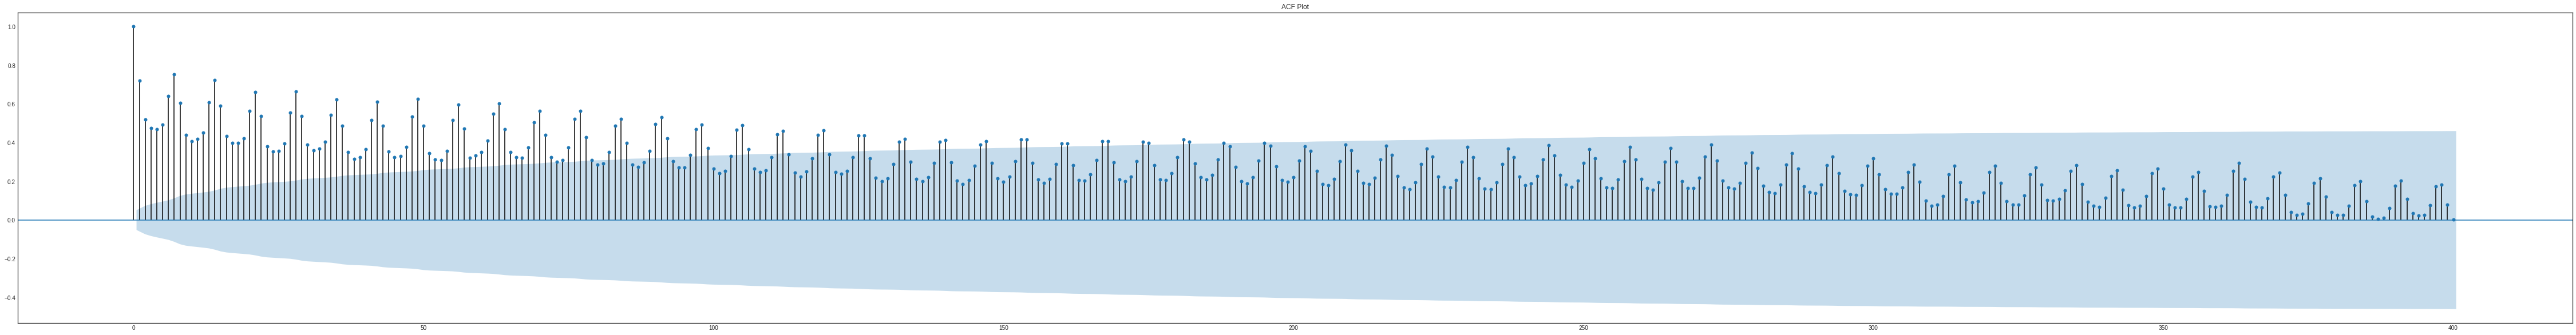

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_plot():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()
  fig,ax=plt.subplots(figsize=(80,10))
  plot_acf(train_daily["unit_sales"],lags=400,title="ACF Plot",ax=ax)
  plt.show()


acf_plot()

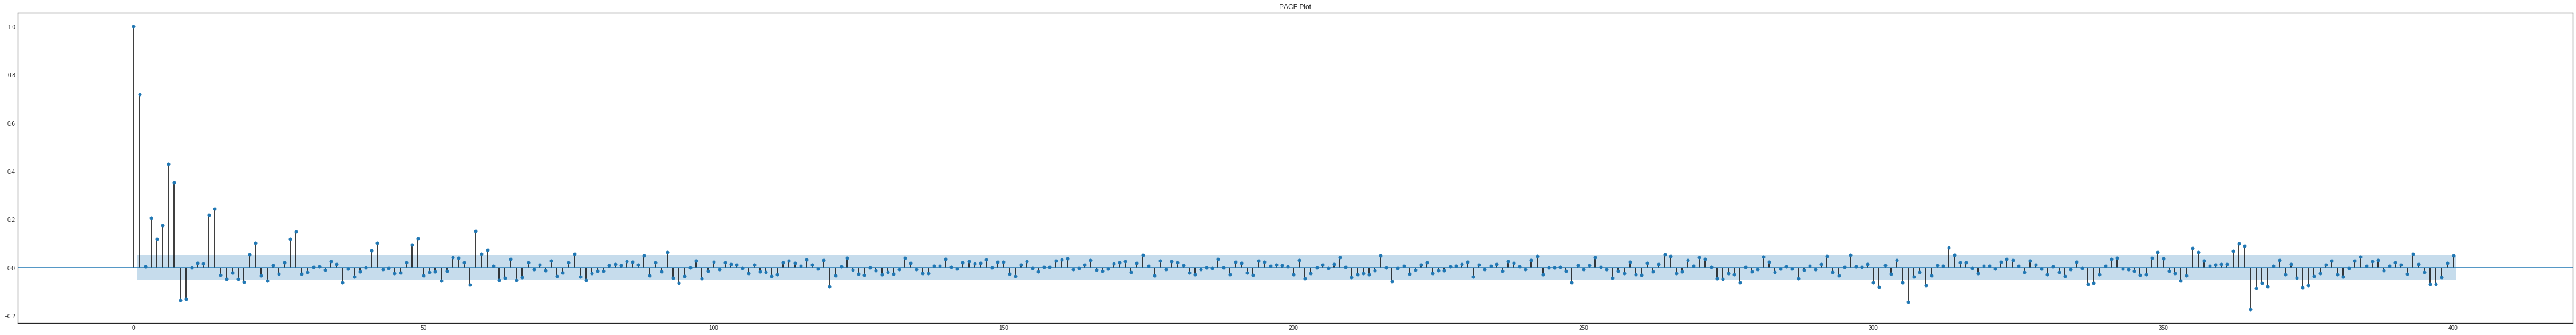

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def pacf_plot():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()
  fig,ax=plt.subplots(figsize=(80,10))
  plot_pacf(train_daily["unit_sales"],lags=400,title="PACF Plot",ax=ax)
  plt.show()


pacf_plot()

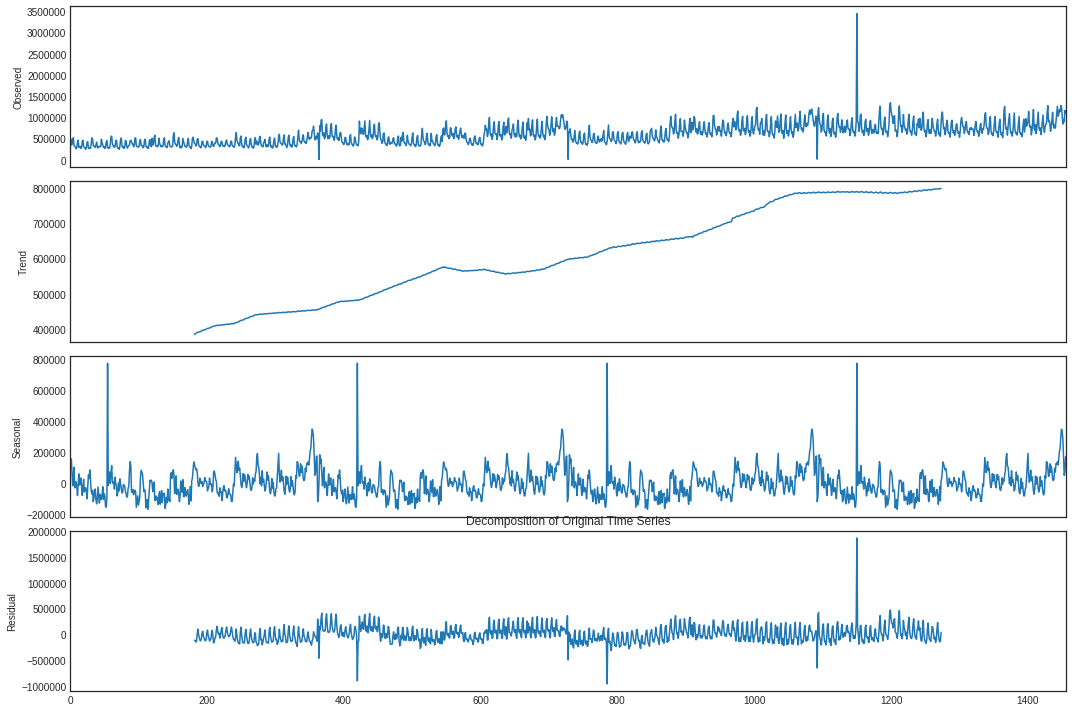

In [ ]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

def ts_decomposition():
  train_daily=trainOpt.groupby('date').unit_sales.sum().reset_index()

  plt.rcParams['figure.figsize']=(15,10)
  decomposition = seasonal_decompose(train_daily["unit_sales"],freq=365) # The frequncy is annual
  decomposition.plot()
  plt.title("Decomposition of Original Time Series")
  plt.show()

ts_decomposition()

**Insight :** The trend shows an increase in total daily sales with time consistent with Plot 1. However, time alone is unlikely to account for all variation in unit sales.

There appears to be seasonality in the data with a time period of 1 year.

**Conclusion from A. & B. :** A. indicates a downtrend in the mean unit sales per day but B. indicates a growth in total unit sales per day. Combining the two, it can therefore be concluded that the customer base of Small Basket is increasing. More number of customers, perhaps from lower economic status/low quantity customers which lowers the mean daily unit sales.



---

---






## **9. Model 1 : LightGBM (Baseline Model - With All Features)**

**Step 1 :** Choose a subset of the data.

In [ ]:
trainOpt

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
0,2015-01-01,25,890372,1.000,False,1002,gro_itm,0,Kan,UP,1,D
1,2015-01-01,25,829389,1.000,False,1025,gro_itm,0,Kan,UP,1,D
2,2015-01-01,25,838216,4.000,False,2124,dar_itm,1,Kan,UP,1,D
3,2015-01-01,25,841197,5.000,False,2708,bak,1,Kan,UP,1,D
4,2015-01-01,25,847859,12.000,False,1122,bev,0,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D


In [ ]:
subset=trainOpt[(trainOpt["date"]>='2018-01-01') & (trainOpt["date"]<='2018-05-31')]

In [ ]:
subset

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
66458908,2018-01-01,25,114800,1.00,False,4126,per_car,0,Kan,UP,1,D
66458909,2018-01-01,25,1460021,1.00,False,3034,cln_utl,0,Kan,UP,1,D
66458910,2018-01-01,25,1463784,4.00,False,1114,bev,0,Kan,UP,1,D
66458911,2018-01-01,25,1463798,5.00,False,1118,bev,0,Kan,UP,1,D
66458912,2018-01-01,25,1239813,2.00,False,2170,dar_itm,1,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
81028892,2018-05-31,22,1239882,28.98,False,2420,veg,1,Gan,GJ,7,C
81028893,2018-05-31,27,115892,15.00,False,1016,gro_itm,0,Mys,KA,1,D
81028894,2018-05-31,7,1997976,5.00,False,1074,gro_itm,0,Ben,KA,8,D
81028895,2018-05-31,7,2011148,1.00,False,1068,gro_itm,0,Ben,KA,8,D


In [ ]:
subset.shape

(14569989, 12)

In [ ]:
subset=subset.reset_index(drop=True)

In [ ]:
subset

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
0,2018-01-01,25,114800,1.00,False,4126,per_car,0,Kan,UP,1,D
1,2018-01-01,25,1460021,1.00,False,3034,cln_utl,0,Kan,UP,1,D
2,2018-01-01,25,1463784,4.00,False,1114,bev,0,Kan,UP,1,D
3,2018-01-01,25,1463798,5.00,False,1118,bev,0,Kan,UP,1,D
4,2018-01-01,25,1239813,2.00,False,2170,dar_itm,1,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
14569984,2018-05-31,22,1239882,28.98,False,2420,veg,1,Gan,GJ,7,C
14569985,2018-05-31,27,115892,15.00,False,1016,gro_itm,0,Mys,KA,1,D
14569986,2018-05-31,7,1997976,5.00,False,1074,gro_itm,0,Ben,KA,8,D
14569987,2018-05-31,7,2011148,1.00,False,1068,gro_itm,0,Ben,KA,8,D


**Step 2 :** Engineer a new feature - 'days since' - which is the number of days from 1st January, 2018.

In [ ]:
now='2018-01-01'
now=pd.to_datetime(now)
subset['days_since']=subset['date']-now

In [ ]:
subset.drop("date",axis=1,inplace=True)

In [ ]:
subset.dtypes

locationId                     int8
item_id                       int32
unit_sales                  float32
onpromotion                category
class                         int16
category_of_item           category
perishable                     int8
city                       category
state                      category
cluster                        int8
type                       category
days_since          timedelta64[ns]
dtype: object

In [ ]:
subset['days_since'] = subset['days_since'].dt.days.astype('int16')

In [ ]:
subset

,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,25,114800,1.00,False,4126,per_car,0,Kan,UP,1,D,0
1,25,1460021,1.00,False,3034,cln_utl,0,Kan,UP,1,D,0
2,25,1463784,4.00,False,1114,bev,0,Kan,UP,1,D,0
3,25,1463798,5.00,False,1118,bev,0,Kan,UP,1,D,0
4,25,1239813,2.00,False,2170,dar_itm,1,Kan,UP,1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14569984,22,1239882,28.98,False,2420,veg,1,Gan,GJ,7,C,150
14569985,27,115892,15.00,False,1016,gro_itm,0,Mys,KA,1,D,150
14569986,7,1997976,5.00,False,1074,gro_itm,0,Ben,KA,8,D,150
14569987,7,2011148,1.00,False,1068,gro_itm,0,Ben,KA,8,D,150


**Step 3 :** Perform label encoding on all categorical features.

In [ ]:
subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]]=subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
subset.dtypes

locationId          category
item_id             category
unit_sales           float32
onpromotion         category
class               category
category_of_item    category
perishable          category
city                category
state               category
cluster             category
type                category
days_since             int16
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
subset['locationId']= le.fit_transform(subset['locationId'])

In [ ]:
subset['item_id']= le.fit_transform(subset['item_id'])

In [ ]:
subset['onpromotion']= le.fit_transform(subset['onpromotion'])

In [ ]:
subset['class']= le.fit_transform(subset['class'])

In [ ]:
subset['category_of_item']= le.fit_transform(subset['category_of_item'])

In [ ]:
subset['city']= le.fit_transform(subset['city'])

In [ ]:
subset['state']= le.fit_transform(subset['state'])

In [ ]:
subset['cluster']= le.fit_transform(subset['cluster'])

In [ ]:
subset['type']= le.fit_transform(subset['type'])

In [ ]:
subset['perishable']= le.fit_transform(subset['perishable'])

In [ ]:
subset

,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,24,29,1.00,0,237,24,0,10,10,0,3,0
1,24,2497,1.00,0,219,3,0,10,10,0,3,0
2,24,2539,4.00,0,61,1,0,10,10,0,3,0
3,24,2547,5.00,0,64,1,0,10,10,0,3,0
4,24,1910,2.00,0,133,4,1,10,10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14569984,21,1946,28.98,0,155,28,1,5,2,6,2,150
14569985,26,37,15.00,0,9,8,0,14,4,0,3,150
14569986,6,3461,5.00,0,45,8,0,1,4,7,3,150
14569987,6,3535,1.00,0,42,8,0,1,4,7,3,150


In [ ]:
subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]]=subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
subset.dtypes

locationId          category
item_id             category
unit_sales           float32
onpromotion         category
class               category
category_of_item    category
perishable          category
city                category
state               category
cluster             category
type                category
days_since             int16
dtype: object

**Step 4 :** Split the dataset into train & validation set.

In [ ]:
subset

,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,24,29,1.00,0,237,24,0,10,10,0,3,0
1,24,2497,1.00,0,219,3,0,10,10,0,3,0
2,24,2539,4.00,0,61,1,0,10,10,0,3,0
3,24,2547,5.00,0,64,1,0,10,10,0,3,0
4,24,1910,2.00,0,133,4,1,10,10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14569984,21,1946,28.98,0,155,28,1,5,2,6,2,150
14569985,26,37,15.00,0,9,8,0,14,4,0,3,150
14569986,6,3461,5.00,0,45,8,0,1,4,7,3,150
14569987,6,3535,1.00,0,42,8,0,1,4,7,3,150


In [ ]:
#********************* FEATURE SELECTION ********************#
subset=subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type",'days_since','unit_sales']]

In [ ]:
subset

,locationId,item_id,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since,unit_sales
0,24,29,0,237,24,0,10,10,0,3,0,1.00
1,24,2497,0,219,3,0,10,10,0,3,0,1.00
2,24,2539,0,61,1,0,10,10,0,3,0,4.00
3,24,2547,0,64,1,0,10,10,0,3,0,5.00
4,24,1910,0,133,4,1,10,10,0,3,0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14569984,21,1946,0,155,28,1,5,2,6,2,150,28.98
14569985,26,37,0,9,8,0,14,4,0,3,150,15.00
14569986,6,3461,0,45,8,0,1,4,7,3,150,5.00
14569987,6,3535,0,42,8,0,1,4,7,3,150,1.00


In [ ]:
train=subset[subset["days_since"]<120]

In [ ]:
train.shape

(11586525, 12)

In [ ]:
valid=subset[subset["days_since"]>=120]

In [ ]:
valid.shape

(2983464, 12)

**Step 5 :** Split the data into X (predictor variable set) & y (target variable)

In [ ]:
X_train=train.drop("unit_sales",axis=1)
y_train=train["unit_sales"]

In [ ]:
X_train

,locationId,item_id,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,24,29,0,237,24,0,10,10,0,3,0
1,24,2497,0,219,3,0,10,10,0,3,0
2,24,2539,0,61,1,0,10,10,0,3,0
3,24,2547,0,64,1,0,10,10,0,3,0
4,24,1910,0,133,4,1,10,10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
11586520,49,1202,0,14,8,0,7,3,13,0,119
11586521,49,1189,0,211,3,0,7,3,13,0,119
11586522,49,1211,0,154,28,1,7,3,13,0,119
11586523,49,1224,0,65,1,0,7,3,13,0,119


In [ ]:
y_train

0            1.000000
1            1.000000
2            4.000000
3            5.000000
4            2.000000
              ...    
11586520    16.000000
11586521    14.000000
11586522    26.872999
11586523    84.000000
11586524     6.000000
Name: unit_sales, Length: 11586525, dtype: float32

In [ ]:
X_valid=valid.drop("unit_sales",axis=1)
y_valid=valid["unit_sales"]

In [ ]:
X_valid

,locationId,item_id,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
11586525,27,2996,0,104,21,1,13,5,9,4,120
11586526,27,3197,0,160,5,1,13,5,9,4,120
11586527,27,2981,0,101,21,1,13,5,9,4,120
11586528,27,3182,0,0,8,0,13,5,9,4,120
11586529,27,3180,0,67,1,0,13,5,9,4,120
...,...,...,...,...,...,...,...,...,...,...,...
14569984,21,1946,0,155,28,1,5,2,6,2,150
14569985,26,37,0,9,8,0,14,4,0,3,150
14569986,6,3461,0,45,8,0,1,4,7,3,150
14569987,6,3535,0,42,8,0,1,4,7,3,150


In [ ]:
y_valid

11586525    11.554
11586526     7.000
11586527     6.214
11586528     5.000
11586529    13.000
             ...  
14569984    28.980
14569985    15.000
14569986     5.000
14569987     1.000
14569988     3.000
Name: unit_sales, Length: 2983464, dtype: float32

**Step 6 :** Build LightGBM model on the train data.

In [ ]:
import lightgbm as lgb

In [ ]:
train_lgb=lgb.Dataset(X_train,label=y_train)

In [ ]:
valid_lgb=lgb.Dataset(X_valid,label=y_valid)

In [ ]:
MAX_ROUNDS = 5000

In [ ]:
cat_ft=["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]

In [ ]:
params={'num_leaves':300,
    'objective': 'regression',
    'min_data_in_leaf': 200,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'metric': 'mape',
    'num_threads': 16,
    'task':'predict'}

In [ ]:
lgbm_regressor_all=lgb.train(params, train_lgb, num_boost_round=MAX_ROUNDS,valid_sets=[train_lgb,valid_lgb], early_stopping_rounds=125, verbose_eval=50,categorical_feature=cat_ft)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['category_of_item', 'city', 'class', 'cluster', 'item_id', 'locationId', 'onpromotion', 'perishable', 'state', 'type']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 125 rounds.
[50]	training's mape: 1.95028	valid_1's mape: 1.95627
[100]	training's mape: 1.65714	valid_1's mape: 1.68871
[150]	training's mape: 1.46696	valid_1's mape: 1.527
[200]	training's mape: 1.34302	valid_1's mape: 1.4626
[250]	training's mape: 1.25373	valid_1's mape: 1.45106
[300]	training's mape: 1.18996	valid_1's mape: 1.47198
[350]	training's mape: 1.14131	valid_1's mape: 1.49406
Early stopping, best iteration is:
[247]	training's mape: 1.25867	valid_1's mape: 1.44448


**Step 7 :** Plot importance of features based on the model.

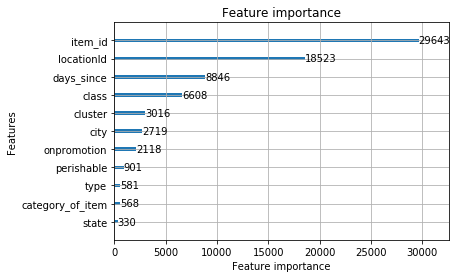

In [ ]:
ax=lgb.plot_importance(lgbm_regressor_all)

**Step 8 :** Predict the validation set results.

In [ ]:
valid_pred=[]
valid_pred.append(lgbm_regressor_all.predict(
        X_valid, num_iteration=lgbm_regressor_all.best_iteration or MAX_ROUNDS))

In [ ]:
valid_pred

[array([10.12665685,  4.66319678,  9.1443165 , ...,  4.56603316,
         3.93029211,  3.37258127])]

**Step 9 :** Evaluate the validation set results.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_valid, valid_pred)

147.3487875661298

**Step 10 :** Prepare the test set.

In [ ]:
test=pd.read_csv('/content/drive/My Drive/PHD 2020/test_merged.csv',na_values=["?",",",""],error_bad_lines=False)

In [ ]:
test

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3


In [ ]:
test.isnull().sum()

id                  0
date                0
locationId          0
item_id             0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [ ]:
test['date']=test['date'].astype('object')
test['date']=pd.to_datetime(test['date'])
test=test.sort_values(by='id')

In [ ]:
test

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3


In [ ]:
now='2018-01-01'
now=pd.to_datetime(now)
test['days_since']=test['date']-now

In [ ]:
test

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1,365 days
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1,365 days
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1,365 days
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1,365 days
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3,379 days
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3,379 days
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3,379 days
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3,379 days


In [ ]:
test.drop("date",axis=1,inplace=True)

In [ ]:
test.dtypes

id                            int64
locationId                    int64
item_id                       int64
onpromotion                    bool
category_of_item             object
class                         int64
perishable                    int64
city                         object
state                        object
type                         object
cluster                       int64
days_since          timedelta64[ns]
dtype: object

In [ ]:
test['days_since'] = test['days_since'].dt.days.astype('int16')

In [ ]:
test

,id,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,0,25,99197,False,gro_itm,1067,0,Kan,UP,D,1,365
1,1,25,103665,False,bak,2712,1,Kan,UP,D,1,365
2,2,25,105574,False,gro_itm,1045,0,Kan,UP,D,1,365
3,3,25,105857,False,gro_itm,1092,0,Kan,UP,D,1,365
4,4,25,106716,False,gro_itm,1032,0,Kan,UP,D,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3,379
1482291,1482291,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3,379
1482292,1482292,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3,379
1482293,1482293,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3,379


In [ ]:
test[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]]=test[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
test.dtypes

id                     int64
locationId          category
item_id             category
onpromotion         category
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
days_since             int16
dtype: object

In [ ]:
test['locationId']= le.fit_transform(test['locationId'])

In [ ]:
test['item_id']= le.fit_transform(test['item_id'])

In [ ]:
test['category_of_item']= le.fit_transform(test['category_of_item'])

In [ ]:
test['city']= le.fit_transform(test['city'])

In [ ]:
test['state']= le.fit_transform(test['state'])

In [ ]:
test['perishable']= le.fit_transform(test['perishable'])

In [ ]:
test['onpromotion']= le.fit_transform(test['onpromotion'])

In [ ]:
test['type']= le.fit_transform(test['type'])

In [ ]:
test['cluster']= le.fit_transform(test['cluster'])

In [ ]:
test

,id,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,0,24,0,0,8,1067,0,10,10,3,0,365
1,1,24,3,0,0,2712,1,10,10,3,0,365
2,2,24,4,0,8,1045,0,10,10,3,0,365
3,3,24,10,0,8,1092,0,10,10,3,0,365
4,4,24,11,0,8,1032,0,10,10,3,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,52,3811,0,8,1016,0,17,1,2,2,379
1482291,1482291,52,3813,0,8,1016,0,17,1,2,2,379
1482292,1482292,52,3814,0,8,1016,0,17,1,2,2,379
1482293,1482293,52,3815,0,8,1016,0,17,1,2,2,379


In [ ]:
test.drop('id',axis=1,inplace=True)

In [ ]:
test

,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,24,0,0,8,1067,0,10,10,3,0,365
1,24,3,0,0,2712,1,10,10,3,0,365
2,24,4,0,8,1045,0,10,10,3,0,365
3,24,10,0,8,1092,0,10,10,3,0,365
4,24,11,0,8,1032,0,10,10,3,0,365
...,...,...,...,...,...,...,...,...,...,...,...
1482290,52,3811,0,8,1016,0,17,1,2,2,379
1482291,52,3813,0,8,1016,0,17,1,2,2,379
1482292,52,3814,0,8,1016,0,17,1,2,2,379
1482293,52,3815,0,8,1016,0,17,1,2,2,379


In [ ]:
test.dtypes

locationId             int64
item_id                int64
onpromotion            int64
category_of_item       int64
class               category
perishable             int64
city                   int64
state                  int64
type                   int64
cluster                int64
days_since             int16
dtype: object

In [ ]:
test[["locationId","item_id","onpromotion","category_of_item","perishable","city","state","cluster","type"]]=test[["locationId","item_id","onpromotion","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
test.dtypes

locationId          category
item_id             category
onpromotion         category
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
days_since             int16
dtype: object

**Step 11 :** Predict the results of unit_sales on the test set.

In [ ]:
test=test[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type",'days_since']]

In [ ]:
test

,locationId,item_id,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,24,0,0,1067,8,0,10,10,0,3,365
1,24,3,0,2712,0,1,10,10,0,3,365
2,24,4,0,1045,8,0,10,10,0,3,365
3,24,10,0,1092,8,0,10,10,0,3,365
4,24,11,0,1032,8,0,10,10,0,3,365
...,...,...,...,...,...,...,...,...,...,...,...
1482290,52,3811,0,1016,8,0,17,1,2,2,379
1482291,52,3813,0,1016,8,0,17,1,2,2,379
1482292,52,3814,0,1016,8,0,17,1,2,2,379
1482293,52,3815,0,1016,8,0,17,1,2,2,379


In [ ]:
y_pred=lgbm_regressor_all.predict(test)

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,3.411601
1,3.482138
2,9.839195
3,3.499910
4,3.570998
...,...
1482290,3.530197
1482291,3.530197
1482292,3.530197
1482293,3.530197


In [ ]:
ids=list(range(0,1482295))
ids=pd.DataFrame(ids)
ids

,0
0,0
1,1
2,2
3,3
4,4
...,...
1482290,1482290
1482291,1482291
1482292,1482292
1482293,1482293


In [ ]:
submission_lgbm_all=pd.concat([ids,y_pred],names=["id","unit_sales"],axis=1)

In [ ]:
submission_lgbm_all.columns=['id','unit_sales']

In [ ]:
submission_lgbm_all

,id,unit_sales
0,0,3.411601
1,1,3.482138
2,2,9.839195
3,3,3.499910
4,4,3.570998
...,...,...
1482290,1482290,3.530197
1482291,1482291,3.530197
1482292,1482292,3.530197
1482293,1482293,3.530197


In [ ]:
submission_lgbm_all.to_csv('/content/drive/My Drive/PHD 2020/LGBMa_AldenPaulPinto_3378.csv')



---



---



## **10. Model 2 : LightGBM (Final Model - With Feature Selection)**

**Step 1 :** Choose a subset of the data.

In [ ]:
trainOpt

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
0,2015-01-01,25,890372,1.000,False,1002,gro_itm,0,Kan,UP,1,D
1,2015-01-01,25,829389,1.000,False,1025,gro_itm,0,Kan,UP,1,D
2,2015-01-01,25,838216,4.000,False,2124,dar_itm,1,Kan,UP,1,D
3,2015-01-01,25,841197,5.000,False,2708,bak,1,Kan,UP,1,D
4,2015-01-01,25,847859,12.000,False,1122,bev,0,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D


In [ ]:
subset=trainOpt[(trainOpt["date"]>='2018-01-01') & (trainOpt["date"]<='2018-12-31')]

In [ ]:
subset

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
66458908,2018-01-01,25,114800,1.000,False,4126,per_car,0,Kan,UP,1,D
66458909,2018-01-01,25,1460021,1.000,False,3034,cln_utl,0,Kan,UP,1,D
66458910,2018-01-01,25,1463784,4.000,False,1114,bev,0,Kan,UP,1,D
66458911,2018-01-01,25,1463798,5.000,False,1118,bev,0,Kan,UP,1,D
66458912,2018-01-01,25,1239813,2.000,False,2170,dar_itm,1,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
101882204,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D
101882205,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D
101882206,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D
101882207,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D


In [ ]:
subset.shape

(35423301, 12)

In [ ]:
subset=subset.reset_index(drop=True)

In [ ]:
subset

,date,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type
0,2018-01-01,25,114800,1.000,False,4126,per_car,0,Kan,UP,1,D
1,2018-01-01,25,1460021,1.000,False,3034,cln_utl,0,Kan,UP,1,D
2,2018-01-01,25,1463784,4.000,False,1114,bev,0,Kan,UP,1,D
3,2018-01-01,25,1463798,5.000,False,1118,bev,0,Kan,UP,1,D
4,2018-01-01,25,1239813,2.000,False,2170,dar_itm,1,Kan,UP,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...
35423296,2018-12-31,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D
35423297,2018-12-31,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D
35423298,2018-12-31,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D
35423299,2018-12-31,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D


**Step 2 :** Engineer a new feature - 'days since' - which is the number of days from 1st January, 2018.

In [ ]:
now='2018-01-01'
now=pd.to_datetime(now)
subset['days_since']=subset['date']-now

In [ ]:
subset.drop("date",axis=1,inplace=True)

In [ ]:
subset.dtypes

locationId                     int8
item_id                       int32
unit_sales                  float32
onpromotion                category
class                         int16
category_of_item           category
perishable                     int8
city                       category
state                      category
cluster                        int8
type                       category
days_since          timedelta64[ns]
dtype: object

In [ ]:
subset['days_since'] = subset['days_since'].dt.days.astype('int16')

In [ ]:
subset

,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,25,114800,1.000,False,4126,per_car,0,Kan,UP,1,D,0
1,25,1460021,1.000,False,3034,cln_utl,0,Kan,UP,1,D,0
2,25,1463784,4.000,False,1114,bev,0,Kan,UP,1,D,0
3,25,1463798,5.000,False,1118,bev,0,Kan,UP,1,D,0
4,25,1239813,2.000,False,2170,dar_itm,1,Kan,UP,1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35423296,5,212552,1.000,False,1044,gro_itm,0,Del,NCR,4,D,364
35423297,5,215332,2.000,False,1040,gro_itm,0,Del,NCR,4,D,364
35423298,5,215352,1.000,False,1016,gro_itm,0,Del,NCR,4,D,364
35423299,26,1473428,9.453,False,2012,otf_pro,1,Mum,MH,10,D,364


**Step 3 :** Perform label encoding on all categorical features.

In [ ]:
subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]]=subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
subset.dtypes

locationId          category
item_id             category
unit_sales           float32
onpromotion         category
class               category
category_of_item    category
perishable          category
city                category
state               category
cluster             category
type                category
days_since             int16
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
subset['locationId']= le.fit_transform(subset['locationId'])

In [ ]:
subset['item_id']= le.fit_transform(subset['item_id'])

In [ ]:
subset['onpromotion']= le.fit_transform(subset['onpromotion'])

In [ ]:
subset['class']= le.fit_transform(subset['class'])

In [ ]:
subset['category_of_item']= le.fit_transform(subset['category_of_item'])

In [ ]:
subset['city']= le.fit_transform(subset['city'])

In [ ]:
subset['state']= le.fit_transform(subset['state'])

In [ ]:
subset['cluster']= le.fit_transform(subset['cluster'])

In [ ]:
subset['type']= le.fit_transform(subset['type'])

In [ ]:
subset['perishable']= le.fit_transform(subset['perishable'])

In [ ]:
subset

,locationId,item_id,unit_sales,onpromotion,class,category_of_item,perishable,city,state,cluster,type,days_since
0,24,29,1.000,0,242,24,0,10,10,0,3,0
1,24,2504,1.000,0,224,3,0,10,10,0,3,0
2,24,2546,4.000,0,64,1,0,10,10,0,3,0
3,24,2554,5.000,0,67,1,0,10,10,0,3,0
4,24,1915,2.000,0,137,4,1,10,10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35423296,4,154,1.000,0,29,8,0,4,7,3,3,364
35423297,4,167,2.000,0,26,8,0,4,7,3,3,364
35423298,4,168,1.000,0,9,8,0,4,7,3,3,364
35423299,25,2733,9.453,0,105,21,1,13,5,9,3,364


In [ ]:
subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]]=subset[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
subset.dtypes

locationId          category
item_id             category
unit_sales           float32
onpromotion         category
class               category
category_of_item    category
perishable          category
city                category
state               category
cluster             category
type                category
days_since             int16
dtype: object

**Step 4 :** Split the dataset into train & validation set.

In [ ]:
subset

,locationId,item_id,class,onpromotion,days_since,unit_sales
0,24,29,242,0,0,1.000
1,24,2504,224,0,0,1.000
2,24,2546,64,0,0,4.000
3,24,2554,67,0,0,5.000
4,24,1915,137,0,0,2.000
...,...,...,...,...,...,...
35423296,4,154,29,0,364,1.000
35423297,4,167,26,0,364,2.000
35423298,4,168,9,0,364,1.000
35423299,25,2733,105,0,364,9.453


In [ ]:
#********************* FEATURE SELECTION ********************#
subset=subset[["locationId",'item_id','class','onpromotion','days_since','unit_sales']]

In [ ]:
subset

,locationId,item_id,class,onpromotion,days_since,unit_sales
0,24,29,242,0,0,1.000
1,24,2504,224,0,0,1.000
2,24,2546,64,0,0,4.000
3,24,2554,67,0,0,5.000
4,24,1915,137,0,0,2.000
...,...,...,...,...,...,...
35423296,4,154,29,0,364,1.000
35423297,4,167,26,0,364,2.000
35423298,4,168,9,0,364,1.000
35423299,25,2733,105,0,364,9.453


In [ ]:
train=subset[subset["days_since"]<273]

In [ ]:
train.shape

(26259795, 6)

In [ ]:
valid=subset[subset["days_since"]>=273]

In [ ]:
valid.shape

(9163506, 6)

**Step 5 :** Split the data into X (predictor variable set) & y (target variable)

In [ ]:
X_train=train.drop("unit_sales",axis=1)
y_train=train["unit_sales"]

In [ ]:
X_train

,locationId,item_id,class,onpromotion,days_since
0,24,29,242,0,0
1,24,2504,224,0,0
2,24,2546,64,0,0
3,24,2554,67,0,0
4,24,1915,137,0,0
...,...,...,...,...,...
26259790,2,1400,122,0,272
26259791,1,1085,45,0,272
26259792,2,1397,6,0,272
26259793,4,1312,123,0,272


In [ ]:
y_train

0            1.0
1            1.0
2            4.0
3            5.0
4            2.0
            ... 
26259790     5.0
26259791    30.0
26259792     5.0
26259793     2.0
26259794     4.0
Name: unit_sales, Length: 26259795, dtype: float32

In [ ]:
X_valid=valid.drop("unit_sales",axis=1)
y_valid=valid["unit_sales"]

In [ ]:
X_valid

,locationId,item_id,class,onpromotion,days_since
26259795,44,3214,158,0,273
26259796,44,3215,64,0,273
26259797,44,3063,307,0,273
26259798,44,3221,23,0,273
26259799,44,3212,64,0,273
...,...,...,...,...,...
35423296,4,154,29,0,364
35423297,4,167,26,0,364
35423298,4,168,9,0,364
35423299,25,2733,105,0,364


In [ ]:
y_valid

26259795    30.059
26259796     1.000
26259797     1.000
26259798     1.000
26259799    19.000
             ...  
35423296     1.000
35423297     2.000
35423298     1.000
35423299     9.453
35423300    18.000
Name: unit_sales, Length: 9163506, dtype: float32

**Step 6 :** Build LightGBM model on the train data.

In [ ]:
import lightgbm as lgb

In [ ]:
train_lgb=lgb.Dataset(X_train,label=y_train)

In [ ]:
valid_lgb=lgb.Dataset(X_valid,label=y_valid)

In [ ]:
MAX_ROUNDS = 5000

In [ ]:
cat_ft=["locationId","item_id","class","onpromotion"]

In [ ]:
params={'num_leaves':300,
    'objective': 'regression',
    'min_data_in_leaf': 200,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'metric': 'mape',
    'num_threads': 16,
    'task':'predict'}

In [ ]:
lgbm_regressor=lgb.train(params, train_lgb, num_boost_round=MAX_ROUNDS,valid_sets=[train_lgb,valid_lgb], early_stopping_rounds=125, verbose_eval=50,categorical_feature=cat_ft)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['class', 'item_id', 'locationId', 'onpromotion']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 125 rounds.
[50]	training's mape: 1.92319	valid_1's mape: 1.94417
[100]	training's mape: 1.63861	valid_1's mape: 1.66297
[150]	training's mape: 1.45688	valid_1's mape: 1.48032
[200]	training's mape: 1.33468	valid_1's mape: 1.33653
[250]	training's mape: 1.25192	valid_1's mape: 1.22916
[300]	training's mape: 1.19046	valid_1's mape: 1.14452
[350]	training's mape: 1.14465	valid_1's mape: 1.0698
[400]	training's mape: 1.11285	valid_1's mape: 1.00561
[450]	training's mape: 1.0833	valid_1's mape: 0.950935
[500]	training's mape: 1.06078	valid_1's mape: 0.910487
[550]	training's mape: 1.04204	valid_1's mape: 0.886084
[600]	training's mape: 1.02459	valid_1's mape: 0.871295
[650]	training's mape: 1.00962	valid_1's mape: 0.860527
[700]	training's mape: 0.996861	valid_1's mape: 0.851227
[750]	training's mape: 0.986518	valid_1's mape: 0.847881
[800]	training's mape: 0.978262	valid_1's mape: 0.844245
[850]	training's mape: 0.97196	valid_1's mape: 0.

**Step 7 :** Predict the validation set results.

In [ ]:
valid_pred=[]
valid_pred.append(lgbm_regressor.predict(
        X_valid, num_iteration=lgbm_regressor.best_iteration or MAX_ROUNDS))

In [ ]:
valid_pred

[array([24.41822799,  3.20660846,  2.97385668, ..., 10.32932251,
         3.98862174,  7.34076681])]

**Step 8 :** Evaluate the validation set results.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_valid, valid_pred)

85.42777327905424

**Step 9 :** Prepare the test set.

In [ ]:
test=pd.read_csv('/content/drive/My Drive/PHD 2020/test_merged.csv',na_values=["?",",",""],error_bad_lines=False)

In [ ]:
test

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3


In [ ]:
test.isnull().sum()

id                  0
date                0
locationId          0
item_id             0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [ ]:
test['date']=test['date'].astype('object')
test['date']=pd.to_datetime(test['date'])
test=test.sort_values(by='id')

In [ ]:
test

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3


In [ ]:
now='2018-01-01'
now=pd.to_datetime(now)
test['days_since']=test['date']-now

In [ ]:
test

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1,365 days
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1,365 days
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1,365 days
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1,365 days
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3,379 days
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3,379 days
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3,379 days
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3,379 days


In [ ]:
test.drop("date",axis=1,inplace=True)

In [ ]:
test.dtypes

id                            int64
locationId                    int64
item_id                       int64
onpromotion                    bool
category_of_item             object
class                         int64
perishable                    int64
city                         object
state                        object
type                         object
cluster                       int64
days_since          timedelta64[ns]
dtype: object

In [ ]:
test['days_since'] = test['days_since'].dt.days.astype('int16')

In [ ]:
test

,id,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,0,25,99197,False,gro_itm,1067,0,Kan,UP,D,1,365
1,1,25,103665,False,bak,2712,1,Kan,UP,D,1,365
2,2,25,105574,False,gro_itm,1045,0,Kan,UP,D,1,365
3,3,25,105857,False,gro_itm,1092,0,Kan,UP,D,1,365
4,4,25,106716,False,gro_itm,1032,0,Kan,UP,D,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3,379
1482291,1482291,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3,379
1482292,1482292,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3,379
1482293,1482293,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3,379


In [ ]:
test[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]]=test[["locationId","item_id","onpromotion","class","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
test.dtypes

id                     int64
locationId          category
item_id             category
onpromotion         category
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
days_since             int16
dtype: object

In [ ]:
test['locationId']= le.fit_transform(test['locationId'])

In [ ]:
test['item_id']= le.fit_transform(test['item_id'])

In [ ]:
test['category_of_item']= le.fit_transform(test['category_of_item'])

In [ ]:
test['city']= le.fit_transform(test['city'])

In [ ]:
test['state']= le.fit_transform(test['state'])

In [ ]:
test['perishable']= le.fit_transform(test['perishable'])

In [ ]:
test['onpromotion']= le.fit_transform(test['onpromotion'])

In [ ]:
test['type']= le.fit_transform(test['type'])

In [ ]:
test['cluster']= le.fit_transform(test['cluster'])

In [ ]:
test

,id,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,0,24,0,0,8,1067,0,10,10,3,0,365
1,1,24,3,0,0,2712,1,10,10,3,0,365
2,2,24,4,0,8,1045,0,10,10,3,0,365
3,3,24,10,0,8,1092,0,10,10,3,0,365
4,4,24,11,0,8,1032,0,10,10,3,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,52,3811,0,8,1016,0,17,1,2,2,379
1482291,1482291,52,3813,0,8,1016,0,17,1,2,2,379
1482292,1482292,52,3814,0,8,1016,0,17,1,2,2,379
1482293,1482293,52,3815,0,8,1016,0,17,1,2,2,379


In [ ]:
test.drop('id',axis=1,inplace=True)

In [ ]:
test

,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,days_since
0,24,0,0,8,1067,0,10,10,3,0,365
1,24,3,0,0,2712,1,10,10,3,0,365
2,24,4,0,8,1045,0,10,10,3,0,365
3,24,10,0,8,1092,0,10,10,3,0,365
4,24,11,0,8,1032,0,10,10,3,0,365
...,...,...,...,...,...,...,...,...,...,...,...
1482290,52,3811,0,8,1016,0,17,1,2,2,379
1482291,52,3813,0,8,1016,0,17,1,2,2,379
1482292,52,3814,0,8,1016,0,17,1,2,2,379
1482293,52,3815,0,8,1016,0,17,1,2,2,379


In [ ]:
test.dtypes

locationId             int64
item_id                int64
onpromotion            int64
category_of_item       int64
class               category
perishable             int64
city                   int64
state                  int64
type                   int64
cluster                int64
days_since             int16
dtype: object

In [ ]:
test[["locationId","item_id","onpromotion","category_of_item","perishable","city","state","cluster","type"]]=test[["locationId","item_id","onpromotion","category_of_item","perishable","city","state","cluster","type"]].astype('category')

In [ ]:
test.dtypes

locationId          category
item_id             category
onpromotion         category
category_of_item    category
class               category
perishable          category
city                category
state               category
type                category
cluster             category
days_since             int16
dtype: object

**Step 10 :** Predict the results of unit_sales on the test set.

In [ ]:
test=test[["locationId",'item_id','class','onpromotion','days_since']]

In [ ]:
test

,locationId,item_id,class,onpromotion,days_since
0,24,0,1067,0,365
1,24,3,2712,0,365
2,24,4,1045,0,365
3,24,10,1092,0,365
4,24,11,1032,0,365
...,...,...,...,...,...
1482290,52,3811,1016,0,379
1482291,52,3813,1016,0,379
1482292,52,3814,1016,0,379
1482293,52,3815,1016,0,379


In [ ]:
y_pred=lgbm_regressor.predict(test)

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,1.451670
1,1.596549
2,1.218966
3,2.102187
4,2.431533
...,...
1482290,1.536081
1482291,1.536081
1482292,1.536081
1482293,1.536081


In [ ]:
ids=list(range(0,1482295))
ids=pd.DataFrame(ids)
ids

,0
0,0
1,1
2,2
3,3
4,4
...,...
1482290,1482290
1482291,1482291
1482292,1482292
1482293,1482293


In [ ]:
submission_lgbm_final=pd.concat([ids,y_pred],names=["id","unit_sales"],axis=1)

In [ ]:
submission_lgbm_final.columns=['id','unit_sales']

In [ ]:
submission_lgbm_final

,id,unit_sales
0,0,1.451670
1,1,1.596549
2,2,1.218966
3,3,2.102187
4,4,2.431533
...,...,...
1482290,1482290,1.536081
1482291,1482291,1.536081
1482292,1482292,1.536081
1482293,1482293,1.536081


In [ ]:
submission_lgbm_final.to_csv('/content/drive/My Drive/PHD 2020/LGBMf_AldenPaulPinto_3378.csv')



---



---



## **11. Answers to Questions from Operations Team**

In [ ]:
test_data=pd.read_csv('/content/drive/My Drive/PHD 2020/test_merged.csv',na_values=["?",",",""],error_bad_lines=False)

In [ ]:
best_prediction=pd.read_csv('/content/drive/My Drive/PHD 2020/Submission2_APP_3378.csv',na_values=["?",",",""],error_bad_lines=False)

In [ ]:
combined_data=pd.concat([test_data,best_prediction["unit_sales"]],axis=1)

In [ ]:
combined_data

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,unit_sales
0,0,2019-01-01,25,99197,False,gro_itm,1067,0,Kan,UP,D,1,3.793815
1,1,2019-01-01,25,103665,False,bak,2712,1,Kan,UP,D,1,4.291715
2,2,2019-01-01,25,105574,False,gro_itm,1045,0,Kan,UP,D,1,-1.336783
3,3,2019-01-01,25,105857,False,gro_itm,1092,0,Kan,UP,D,1,6.493061
4,4,2019-01-01,25,106716,False,gro_itm,1032,0,Kan,UP,D,1,-0.726403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482290,1482290,2019-01-15,54,2048381,False,gro_itm,1016,0,Pat,BR,C,3,-0.335830
1482291,1482291,2019-01-15,54,2048421,False,gro_itm,1016,0,Pat,BR,C,3,6.660482
1482292,1482292,2019-01-15,54,2048471,False,gro_itm,1016,0,Pat,BR,C,3,12.499241
1482293,1482293,2019-01-15,54,2048515,False,gro_itm,1016,0,Pat,BR,C,3,3.309440


### **Question 1 :** Business units belonging to which cluster will see the highest amount of sales for the first 15 days of 2019?

- Based on sum

In [ ]:
cluster_sum=combined_data.groupby('cluster').unit_sales.sum().reset_index()
cluster_sum

,cluster,unit_sales
0,1,5.776445e+05
1,2,3.923568e+05
2,3,6.934388e+05
3,4,4.788973e+05
4,5,7.542985e+05
5,6,1.341834e+06
6,7,1.832780e+05
7,8,1.248430e+06
8,9,3.153905e+05
9,10,9.395301e+05


In [ ]:
cluster_sum[cluster_sum.unit_sales==cluster_sum.unit_sales.max()]

,cluster,unit_sales
13,14,1.883140e+06


**Answer :** Cluster 14 will see the highest *total* amount of sales for the first 15 days of January 2019.

- Based on mean

In [ ]:
cluster_mean=combined_data.groupby('cluster').unit_sales.mean().reset_index()
cluster_mean

,cluster,unit_sales
0,1,6.580593
1,2,6.295234
2,3,5.307810
3,4,5.438307
4,5,18.844271
5,6,7.792209
6,7,4.404450
7,8,11.521138
8,9,5.472014
9,10,6.183885


In [ ]:
cluster_mean[cluster_mean.unit_sales==cluster_mean.unit_sales.max()]

,cluster,unit_sales
4,5,18.844271


**Answer :** Cluster 5 will see the highest *mean* amount of sales for the first 15 days of January 2019.



---



### **Question 2 :** What are the top 10 selling items in this cluster?

In [ ]:
cluster_14=combined_data[combined_data.cluster==14]
cluster_14

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,unit_sales
95269,95269,2019-01-02,46,99197,False,gro_itm,1067,0,Ben,KA,A,14,-1.733201
95270,95270,2019-01-02,46,103520,False,gro_itm,1028,0,Ben,KA,A,14,-0.300266
95271,95271,2019-01-02,46,103665,False,bak,2712,1,Ben,KA,A,14,20.333897
95272,95272,2019-01-02,46,105574,False,gro_itm,1045,0,Ben,KA,A,14,51.658616
95273,95273,2019-01-02,46,105575,False,gro_itm,1045,0,Ben,KA,A,14,116.604794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476053,1476053,2019-01-15,50,2048633,False,gro_itm,1016,0,Gur,HR,A,14,5.441442
1476054,1476054,2019-01-15,50,2049037,False,kitchen_utilities_2,6222,0,Gur,HR,A,14,3.485098
1476055,1476055,2019-01-15,50,2054101,False,bev,1114,0,Gur,HR,A,14,20.230657
1476056,1476056,2019-01-15,50,2054291,False,bev,1114,0,Gur,HR,A,14,3.557069


In [ ]:
items_14=cluster_14.groupby('item_id').unit_sales.sum().reset_index()
items_14

,item_id,unit_sales
0,99197,8.972775
1,103520,129.045396
2,103665,135.956984
3,105574,1290.966119
4,105575,2442.990888
...,...,...
3446,2049153,36.386509
3447,2054101,821.332675
3448,2054291,252.306701
3449,2057231,1709.122192


In [ ]:
items_14.sort_values(by='unit_sales',ascending=False,inplace=True)

In [ ]:
top_10=items_14.iloc[0:10,:]
top_10

,item_id,unit_sales
3398,2042947,31099.547766
357,364738,15476.607291
2326,1463992,14442.243919
434,414750,12440.816341
656,584028,11390.471944
3397,2042941,11260.768360
2514,1503844,11199.055693
2327,1463993,11102.559155
2602,1642399,11047.531057
1280,1047679,10142.892168


**Answer :** The above items are the top 10 selling items in this cluster.



---



### **Question 3 :** What is the rate of purchase per week for these items?

In [ ]:
top_10['weekly_rate_of_purchase']=(top_10['unit_sales']/15)*7
top_10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,item_id,unit_sales,weekly_rate_of_purchase
3398,2042947,31099.547766,14513.122291
357,364738,15476.607291,7222.416736
2326,1463992,14442.243919,6739.713829
434,414750,12440.816341,5805.714292
656,584028,11390.471944,5315.553574
3397,2042941,11260.768360,5255.025235
2514,1503844,11199.055693,5226.225990
2327,1463993,11102.559155,5181.194272
2602,1642399,11047.531057,5155.514493
1280,1047679,10142.892168,4733.349679


**Answer :** The weekly rate of purchase for the top 10 items of Cluster 14 is given above.



---



---



---

